In [ ]:
# Instalação dos pacotes CUDA necessários
!pip install nvidia-cublas-cu12==12.1.3.1
!pip install nvidia-cuda-cupti-cu12==12.1.105
!pip install nvidia-cuda-nvrtc-cu12==12.1.105
!pip install nvidia-cuda-runtime-cu12==12.1.105
!pip install nvidia-cudnn-cu12==8.9.2.26
!pip install nvidia-cufft-cu12==11.0.2.54
!pip install nvidia-curand-cu12==10.3.2.106
!pip install nvidia-cusolver-cu12==11.4.5.107
!pip install nvidia-cusparse-cu12==12.1.0.106
!pip install nvidia-nvtx-cu12==12.1.105

# Observação: Ajuste a instalação de nvidia-nccl-cu12 para a versão 2.20.5 para evitar conflitos com outras versões do pacote
!pip install nvidia-nccl-cu12==2.20.5

# Instalação das bibliotecas Python adicionais necessárias para o projeto
!pip install ucimlrepo seaborn plotnine xgboost catboost imbalanced-learn

In [ ]:
# Importação de bibliotecas essenciais
import numpy as np  # Álgebra linear
import pandas as pd  # Processamento de dados, E/S de arquivos CSV (ex: pd.read_csv)

# Alterando o caminho do diretório para um nome genérico
import os
for dirname, _, filenames in os.walk('/meu_diretorio/input'):
    for filename in filenames:
        # Exibindo o caminho completo de cada arquivo encontrado no diretório
        print(os.path.join(dirname, filename))

# Suprimir avisos de futuras versões para manter a saída limpa
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualização de dados baseada no matplotlib
import matplotlib.pyplot as plt  # Biblioteca principal de visualização de dados

# Bibliotecas para imputação de valores ausentes
from sklearn.impute import SimpleImputer  # Imputação simples
from sklearn.impute import KNNImputer  # Imputação baseada em K-Nearest Neighbors

# Biblioteca para estatísticas e funções científicas
from scipy import stats

# Biblioteca para visualização de dados no estilo ggplot2
from plotnine import ggplot, aes, geom_qq, geom_qq_line, ggtitle, theme_minimal

# Biblioteca para divisão de dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# Importação do módulo fetch_ucirepo da biblioteca ucimlrepo para buscar conjuntos de dados do repositório UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

In [ ]:
# Executa a operação: de ucimlrepo importar fetch_ucirepo
from ucimlrepo import fetch_ucirepo

# Executa a operação:

# fetch dataset
# Busca o dataset de hepatite do repositório UCI com ID 46.
# Executa a operação:
hepatitis = fetch_ucirepo(id=46)

# data (como pandas dataframes)
# Armazena como features do dataset de hepatite em X, que contém como variáveis independentes.
# Armazena os targets do dataset de hepatite em y, que contém a variável dependente ou alvo.
# Executa a operação:
X = hepatitis.data.features
y = hepatitis.data.targets

# Fonte dos Dados: [https://archive.ics.uci.edu/dataset/46/hepatitis](https://archive.ics.uci.edu/dataset/46/hepatitis)

## **Descrição dos Dados**

Os dados fornecidos são de um conjunto de dados médicos focado em pacientes com hepatite. Os atributos incluem:

**Variáveis Demográficas:**
- **Age (Idade):** Variável contínua inteira.
- **Sex (Sexo):** Variável categórica binária (assumindo que '1' e '2' correspondem a masculino e feminino, ou vice-versa).

**Variáveis de Tratamento:**
- **Steroid (Esteroides):** Variável categórica binária indicando o uso de esteroides.
- **Antivirals (Antivirais):** Variável categórica binária indicando o uso de medicamentos antivirais.

**Variáveis de Sintomas:**
- **Fatigue (Fadiga):** Variável categórica binária indicando a presença de fadiga.
- **Malaise (Mal-estar):** Variável categórica binária indicando a presença de mal-estar.
- **Anorexia:** Variável categórica binária indicando a presença de anorexia.

**Variáveis de Função e Condição Hepática:**
- **Liver Big (Fígado Aumentado):** Variável categórica binária indicando se o fígado está aumentado.
- **Liver Firm (Fígado Firme):** Variável categórica binária indicando se o fígado está firme.
- **Spleen Palpable (Baço Palpável):** Variável categórica binária indicando se o baço é palpável.
- **Spiders (Aranhas Vasculares):** Variável categórica binária indicando a presença de aranhas vasculares.
- **Ascites:** Variável categórica binária indicando a presença de ascite.
- **Varices (Varizes):** Variável categórica binária indicando a presença de varizes.

**Resultados de Testes Laboratoriais:**
- **Bilirubin (Bilirrubina):** Variável contínua indicando os níveis de bilirrubina.
- **Alk Phosphate (Fosfatase Alcalina):** Variável contínua indicando os níveis de fosfatase alcalina.
- **Sgot:** Variável contínua indicando os níveis de SGOT.
- **Albumin (Albumina):** Variável contínua indicando os níveis de albumina.
- **Protime (Tempo de Protrombina):** Variável contínua indicando o tempo de protrombina.

**Resultado e Exame Histológico:**
- **Histology (Histologia):** Variável categórica binária indicando se um exame histológico foi realizado.
- **Class (Classe):** Variável categórica alvo indicando o desfecho ('DIE' ou 'LIVE').

O conjunto de dados inclui variáveis categóricas (binárias e nominais) e contínuas.
- As características categóricas incluem 'Steroid' (Esteroides), 'Antivirals' (Antivirais), 'Fatigue' (Fadiga), 'Malaise' (Mal-estar), 'Anorexia', 'Liver Big' (Fígado Aumentado), 'Liver Firm' (Fígado Firme), 'Spleen Palpable' (Baço Palpável), 'Spiders' (Aranhas Vasculares), 'Ascites', 'Varices' (Varizes) e 'Histology' (Histologia), que são binárias, codificadas como '1' e '2' ou 'sim' e 'não'.
- As características contínuas, como 'Bilirubin' (Bilirrubina), 'Alk Phosphate' (Fosfatase Alcalina), 'Sgot', 'Albumin' (Albumina) e 'Protime' (Tempo de Protrombina), representam medições fisiológicas que são críticas para diagnosticar e monitorar a função e danos hepáticos.
- 'Histology' (Histologia) é uma característica binária indicando se um exame histológico foi realizado, que é um exame microscópico do tecido para estudar as manifestações da doença.
- A variável 'Class' (Classe) é categórica, com valores indicando o desfecho do paciente após o diagnóstico de hepatite.

## **Informações Adicionais sobre Variáveis**


     1. Class: DIE, LIVE

     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80

     3. SEX: male, female

     4. STEROID: no, yes

     5. ANTIVIRALS: no, yes

     6. FATIGUE: no, yes

     7. MALAISE: no, yes

     8. ANOREXIA: no, yes

     9. LIVER BIG: no, yes

    10. LIVER FIRM: no, yes

    11. SPLEEN PALPABLE: no, yes

    12. SPIDERS: no, yes

    13. ASCITES: no, yes

    14. VARICES: no, yes

    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00

    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250

    17. SGOT: 13, 100, 200, 300, 400, 500,

    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0

    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90

    20. HISTOLOGY: no, yes




In [ ]:
data = pd.concat([X,y], axis=1)

In [ ]:
(data.head(), data.tail(), data.shape)

(   Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
 0   30    2      1.0           2      2.0      2.0       2.0        1.0   
 1   50    1      1.0           2      1.0      2.0       2.0        1.0   
 2   78    1      2.0           2      1.0      2.0       2.0        2.0   
 3   31    1      NaN           1      2.0      2.0       2.0        2.0   
 4   34    1      2.0           2      2.0      2.0       2.0        2.0   
 
    Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
 0         2.0              2.0      2.0      2.0      2.0        1.0   
 1         2.0              2.0      2.0      2.0      2.0        0.9   
 2         2.0              2.0      2.0      2.0      2.0        0.7   
 3         2.0              2.0      2.0      2.0      2.0        0.7   
 4         2.0              2.0      2.0      2.0      2.0        1.0   
 
    Alk Phosphate   Sgot  Albumin  Protime  Histology  Class  
 0           85.0   18.0      4.0      

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
Steroid,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
Fatigue,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
Malaise,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
Anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
Liver Big,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
Liver Firm,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0
Spleen Palpable,150.0,1.800000,0.401340,1.0,2.00,2.0,2.00,2.0


### Salva os dados CSV dentro do disco



In [ ]:
data.to_csv('hepatitis.csv', index=False)

In [ ]:
# Verifica se há valores ausentes em cada coluna
data.isnull().sum()

,0
Age,0
Sex,0
Steroid,1
Antivirals,0
Fatigue,1
Malaise,1
Anorexia,1
Liver Big,10
Liver Firm,11
Spleen Palpable,5


In [ ]:
# Exibe um resumo informativo sobre o DataFrame, incluindo o número de entradas, colunas e tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

## **Observações:**

- O conjunto de dados possui 155 entradas, indicando que inclui informações sobre aproximadamente 155 indivíduos.
- Cada coluna representa um atributo diferente, sendo a maioria do tipo float64, o que indica que os dados são numéricos e possivelmente contínuos ou categóricos codificados como números. Existem também algumas colunas int64, que provavelmente são dados categóricos codificados como inteiros.
- Várias colunas possuem valores ausentes (nulos), como 'Steroid' (Esteroides), 'Fatigue' (Fadiga), 'Malaise' (Mal-estar), 'Anorexia', 'Liver Big' (Fígado Aumentado), 'Liver Firm' (Fígado Firme), 'Spleen Palpable' (Baço Palpável),'Spiders' (Aranhas Vasculares), 'Ascites' (Ascite), 'Varices' (Varizes), 'Bilirubin' (Bilirrubina), 'Alk Phosphate' (Fosfatase Alcalina), 'Sgot', 'Albumin' (Albumina) e 'Protime' (Tempo de Protrombina). A coluna 'Protime' possui o maior número de valores ausentes, com apenas 88 valores não nulos entre 155, o que exigirá um cuidado especial durante o pré-processamento.
- A coluna 'Class' (Classe), que é a variável alvo, está totalmente preenchida, indicando que não há rótulos ausentes para a tarefa de previsão.


### **Compreendendo Valores Ausentes**





### Utilizamos imputação preditiva que envolve o uso de modelos para estimar valores ausentes com base em outros atributos não ausentes nos dados. Neste caso, usaremos o algoritmo k-Nearest Neighbors (KNN), que encontra os 'k' amostras mais próximas da amostra com dados ausentes e imputa valores com base nos valores dos vizinhos mais próximos.


### A imputação preditiva ajuda a preservar as relações entre variáveis, pois utiliza informações de todo o conjunto de dados.


In [ ]:
# Inicializa o KNNImputer com 5 vizinhos
imputer = KNNImputer(n_neighbors=5)

# Remove a coluna 'Class' para não incluí-la na imputação
imputed_cols = data.columns.drop('Class')
# Aplica o imputer aos dados restantes
hep_data = imputer.fit_transform(data[imputed_cols])

# Converte o array retornado de volta para um DataFrame do pandas e adiciona a coluna 'Class' de volta
hep_data = pd.DataFrame(hep_data, columns=imputed_cols)
hep_data['Class'] = data['Class']

# Verifica se não há mais valores ausentes presentes nos dados
print(hep_data.isnull().sum())

Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
Class              0
dtype: int64


In [ ]:
# Exibe um resumo informativo sobre o DataFrame, incluindo o número de entradas, colunas e tipos de dados
hep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    float64
 1   Sex              155 non-null    float64
 2   Steroid          155 non-null    float64
 3   Antivirals       155 non-null    float64
 4   Fatigue          155 non-null    float64
 5   Malaise          155 non-null    float64
 6   Anorexia         155 non-null    float64
 7   Liver Big        155 non-null    float64
 8   Liver Firm       155 non-null    float64
 9   Spleen Palpable  155 non-null    float64
 10  Spiders          155 non-null    float64
 11  Ascites          155 non-null    float64
 12  Varices          155 non-null    float64
 13  Bilirubin        155 non-null    float64
 14  Alk Phosphate    155 non-null    float64
 15  Sgot             155 non-null    float64
 16  Albumin          155 non-null    float64
 17  Protime         

In [ ]:
# Renomeia a variável 'Class' para 'Hepatitis Status' e mapeia os valores 1 e 2 para 'DIE' e 'LIVE', respectivamente
hep_data['Hepatitis Status'] = hep_data['Class'].map({1: 'DIE', 2: 'LIVE'})

# Agora, remove a coluna original 'Class', pois não é mais necessária
hep_data.drop('Class', axis=1, inplace=True)

In [ ]:
# Define as colunas contínuas
continuous_cols = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

# Define as colunas categóricas
categorical_cols = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
                    'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites',
                    'Varices', 'Histology']

# Converte as colunas categóricas para o tipo 'category'
for col in categorical_cols:
    hep_data[col] = hep_data[col].astype('category')

# Cria DataFrames separados para dados contínuos e categóricos
df_cont = hep_data[continuous_cols]
df_cat = hep_data[categorical_cols]

In [ ]:
# Exibe um resumo informativo sobre o DataFrame, incluindo o número de entradas, colunas e tipos de dados
hep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               155 non-null    float64 
 1   Sex               155 non-null    category
 2   Steroid           155 non-null    category
 3   Antivirals        155 non-null    category
 4   Fatigue           155 non-null    category
 5   Malaise           155 non-null    category
 6   Anorexia          155 non-null    category
 7   Liver Big         155 non-null    category
 8   Liver Firm        155 non-null    category
 9   Spleen Palpable   155 non-null    category
 10  Spiders           155 non-null    category
 11  Ascites           155 non-null    category
 12  Varices           155 non-null    category
 13  Bilirubin         155 non-null    float64 
 14  Alk Phosphate     155 non-null    float64 
 15  Sgot              155 non-null    float64 
 16  Albumin           155 non-

## Distribuição de Hepatite

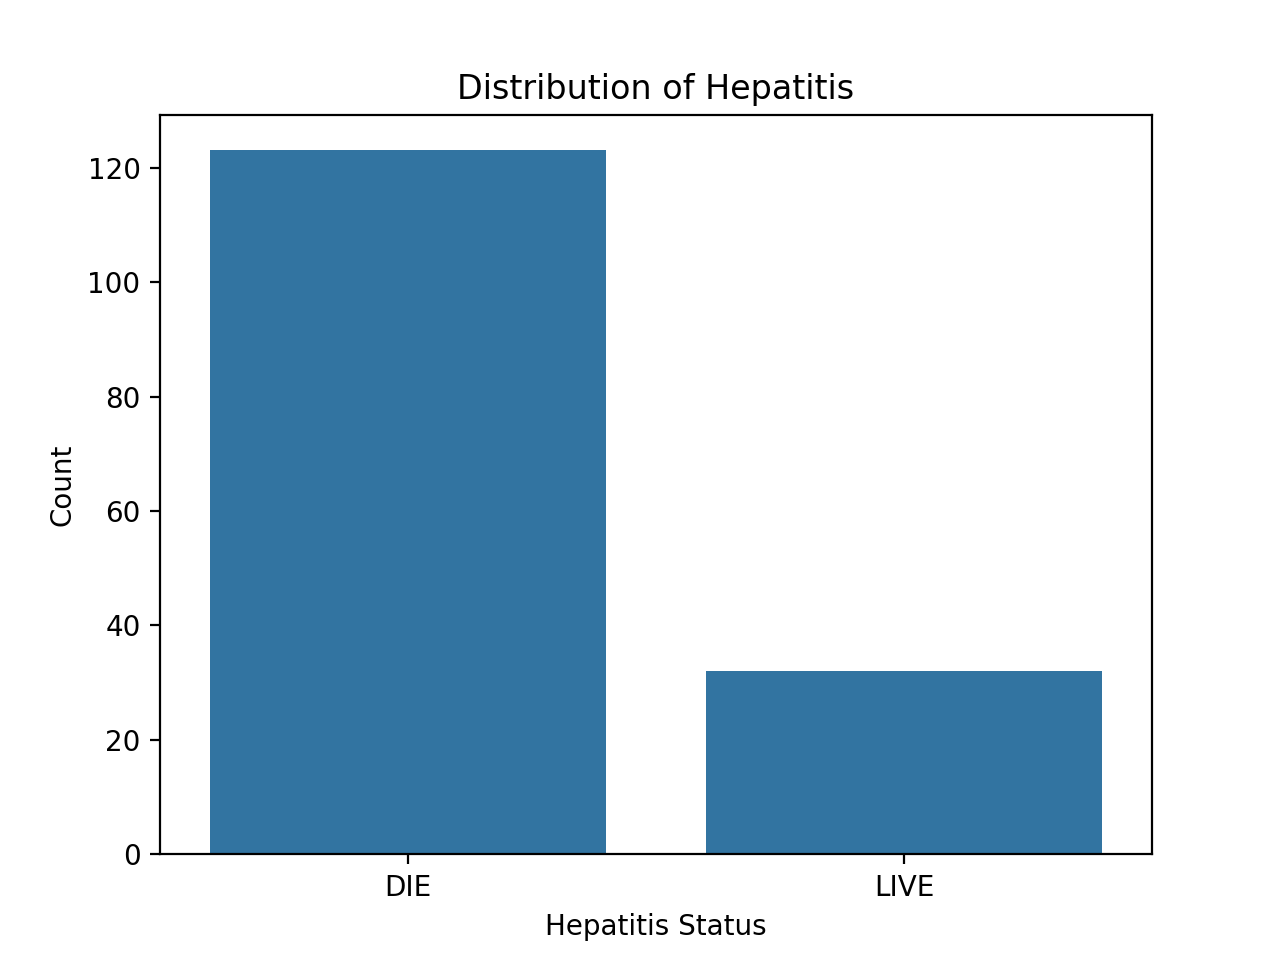

In [ ]:
# Plota um gráfico de contagem da variável 'Hepatitis Status'
sns.countplot(x='Hepatitis Status', data=hep_data)
plt.title('Distribution of Hepatitis')
plt.xlabel('Hepatitis Status')
plt.ylabel('Count')

# Define os rótulos do eixo x
plt.xticks(ticks=[0, 1], labels=['DIE', 'LIVE'])

# Exibe o gráfico
plt.show()

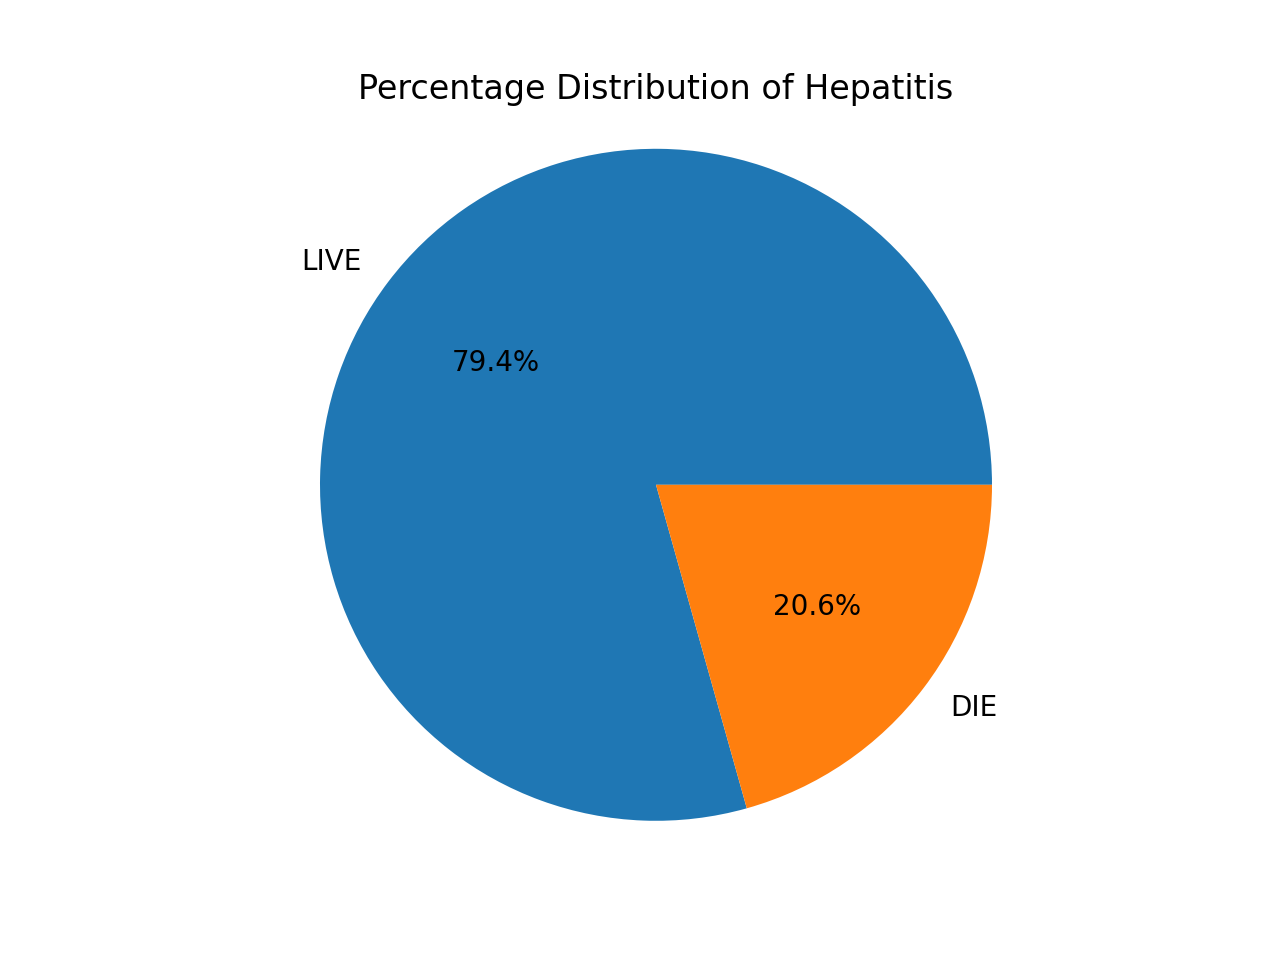

In [ ]:
# Calcula a distribuição percentual da variável 'Hepatitis Status'
hepatitis_distribution = hep_data['Hepatitis Status'].value_counts(normalize=True) * 100

# Plota um gráfico de pizza para mostrar a distribuição percentual
plt.pie(hepatitis_distribution, labels=hepatitis_distribution.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage Distribution of Hepatitis')

# Exibe o gráfico de pizza
plt.show()

## Observações:

- A barra 'DIE' é significativamente menor do que a barra 'LIVE', indicando que, dentro deste conjunto de dados, há menos casos de pacientes que morreram ('DIE') em comparação aos que sobreviveram ('LIVE') após serem diagnosticados com hepatite.

- Essa distribuição sugere que o conjunto de dados pode estar desbalanceado em relação à variável de desfecho, o que é um aspecto importante a considerar ao desenvolver modelos preditivos. Dados desbalanceados podem levar a modelos que são tendenciosos para a classe majoritária – neste caso, 'LIVE'.

- Como este é um desfecho relacionado à saúde, mesmo que a classe 'LIVE' seja mais comum, cada caso de 'DIE' é crucial, e a capacidade de um modelo preditivo de identificar com precisão os casos de 'DIE' (potencialmente indicando um curso da doença mais grave) é muitas vezes mais importante do que sua capacidade de identificar casos de 'LIVE'. Isso se deve ao maior custo associado aos falsos negativos em diagnósticos médicos e à necessidade de intervenção precoce em casos mais graves.

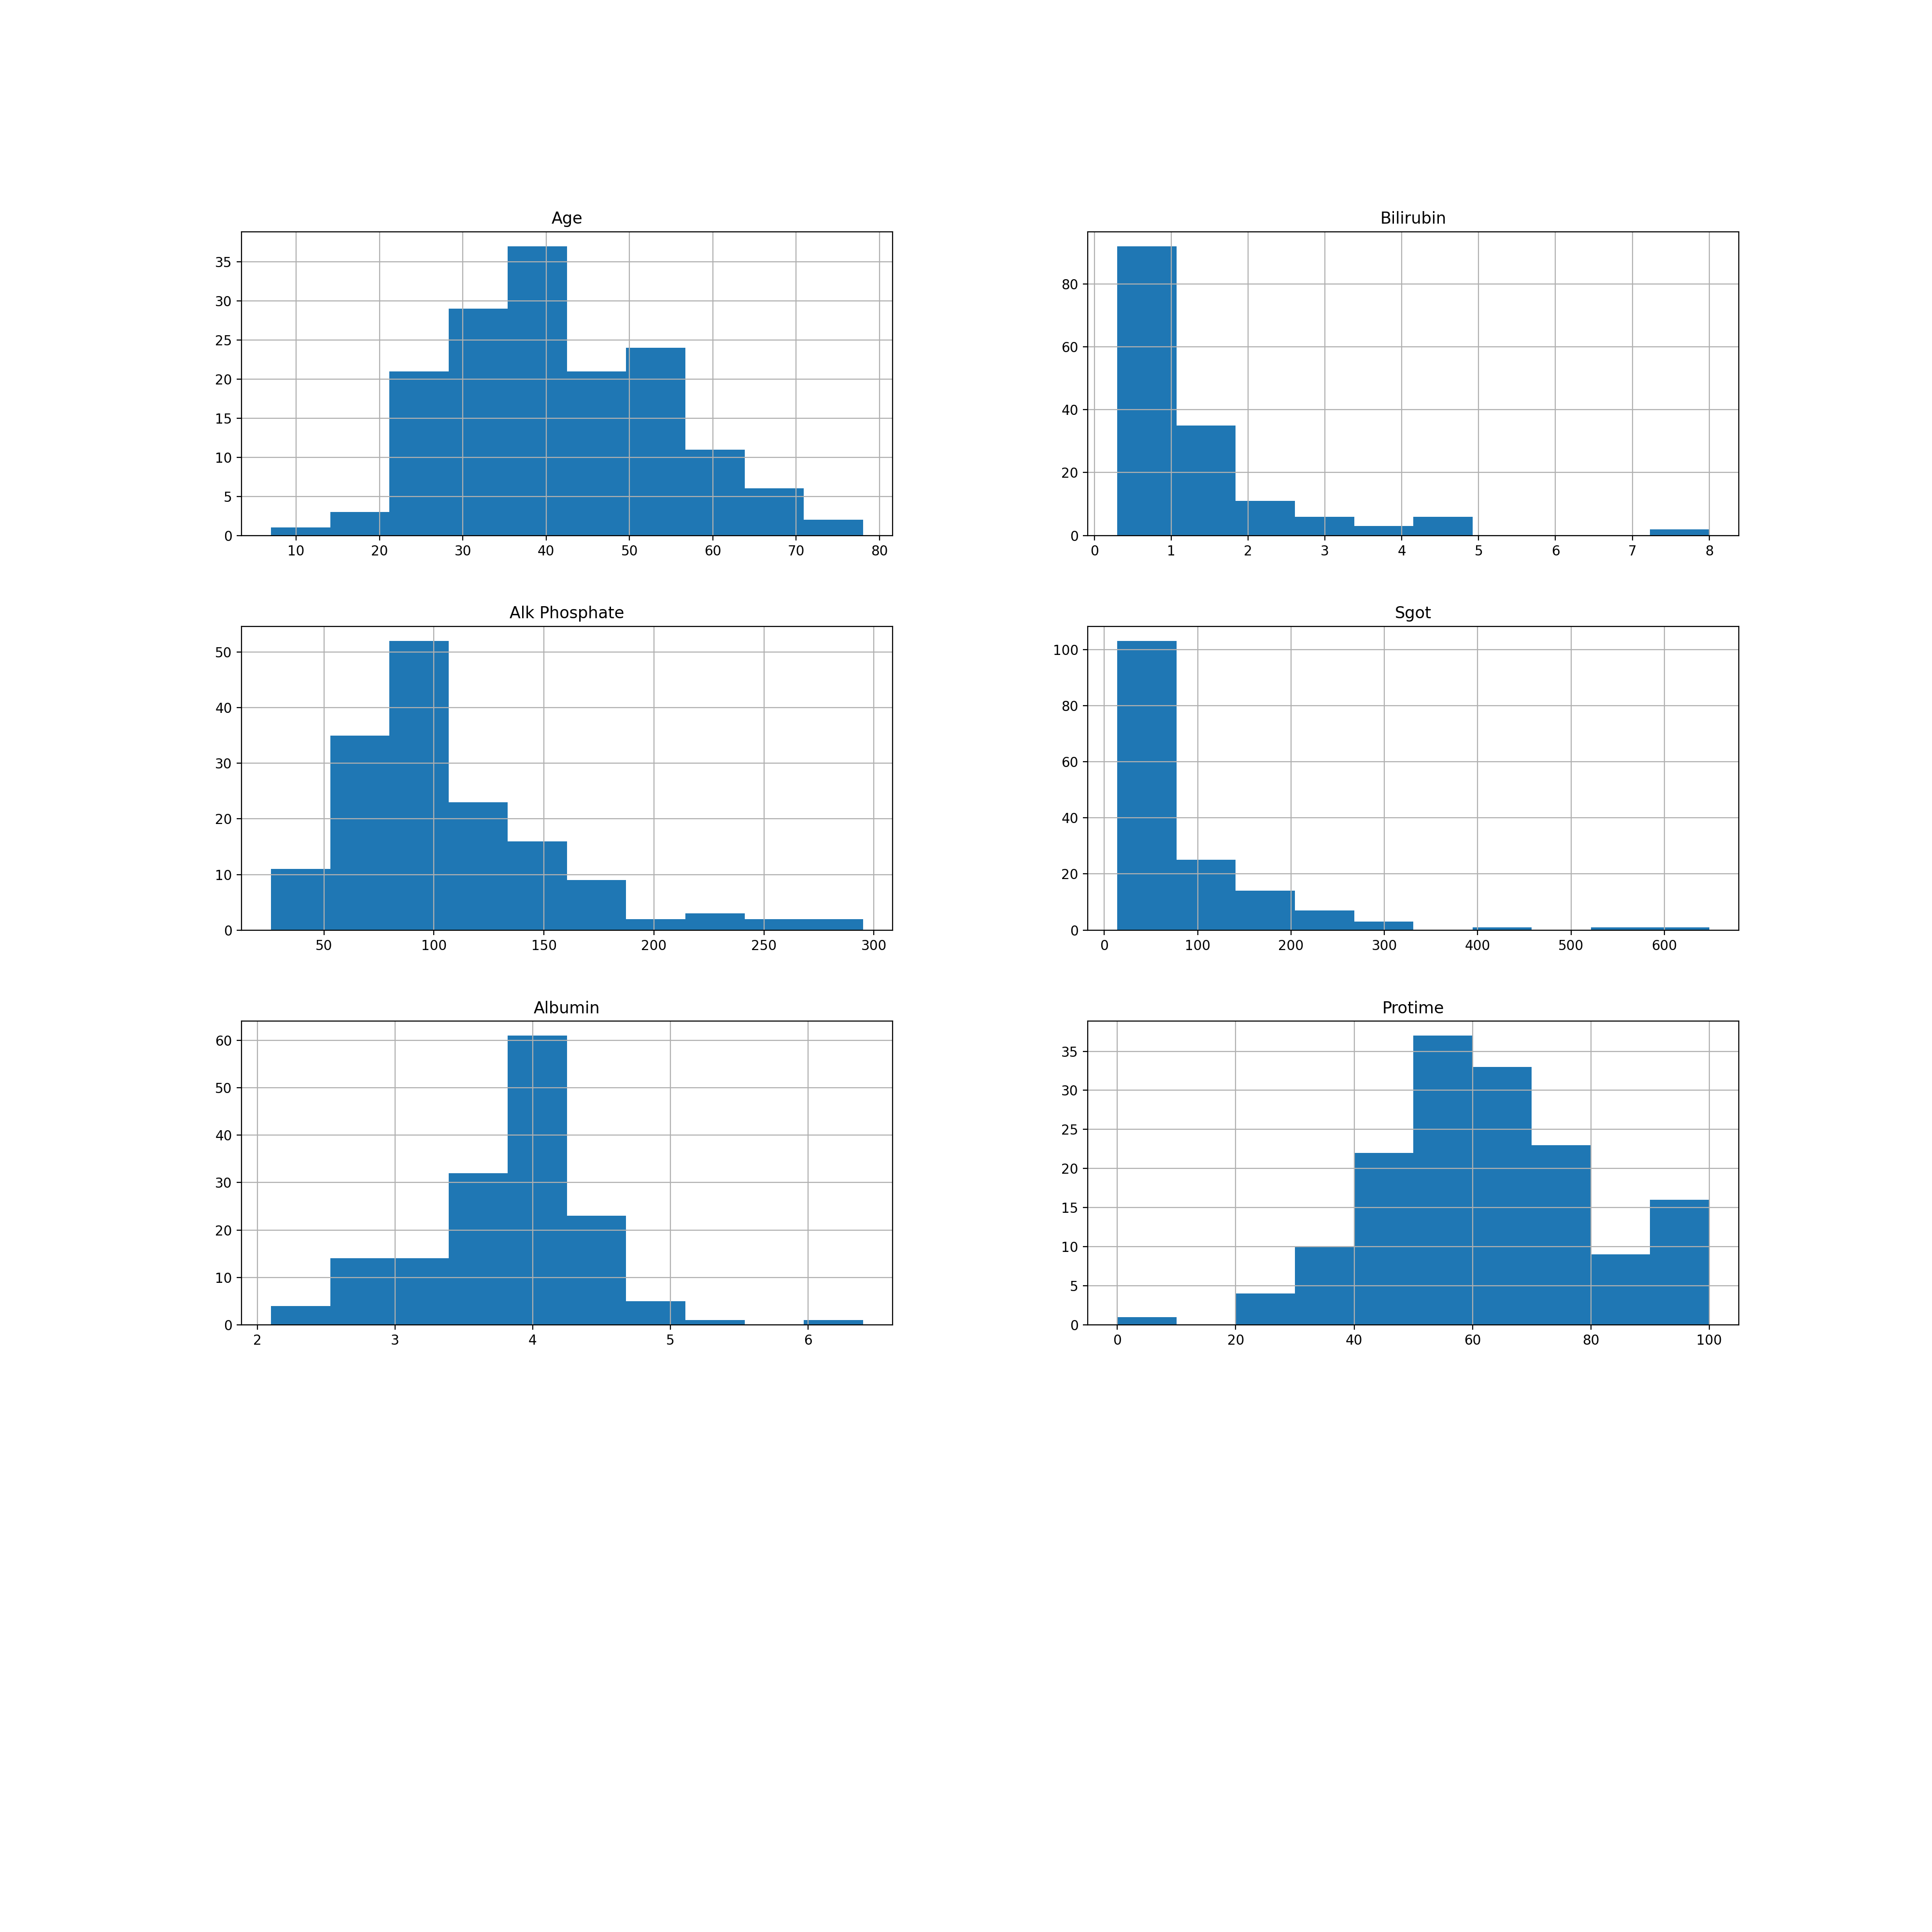

In [ ]:
# Histograma para características contínuas
df_cont.hist(bins=10, figsize=(20, 20), layout=(4, 2))
plt.show()

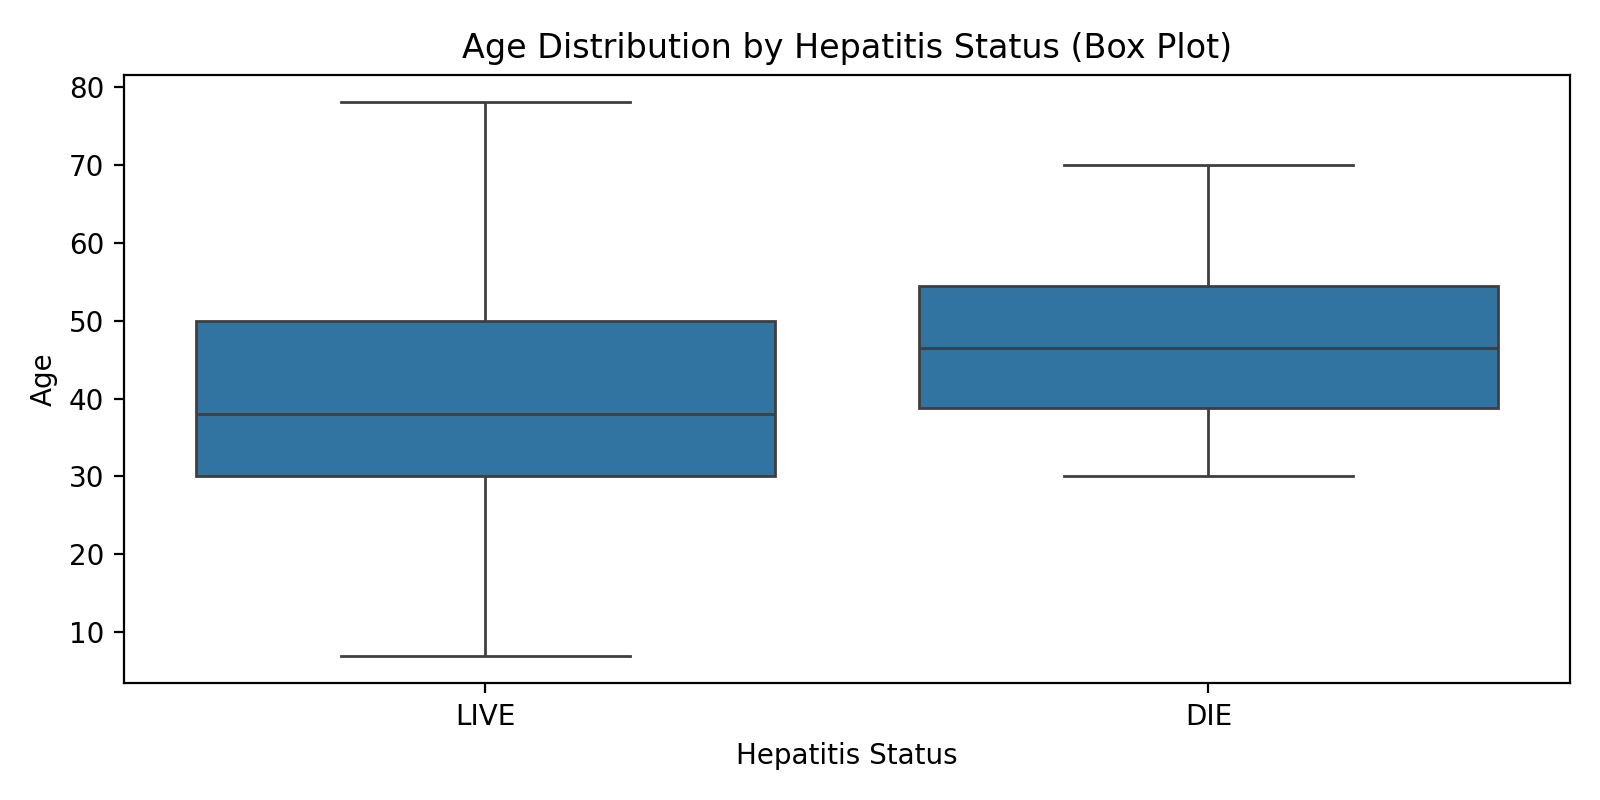

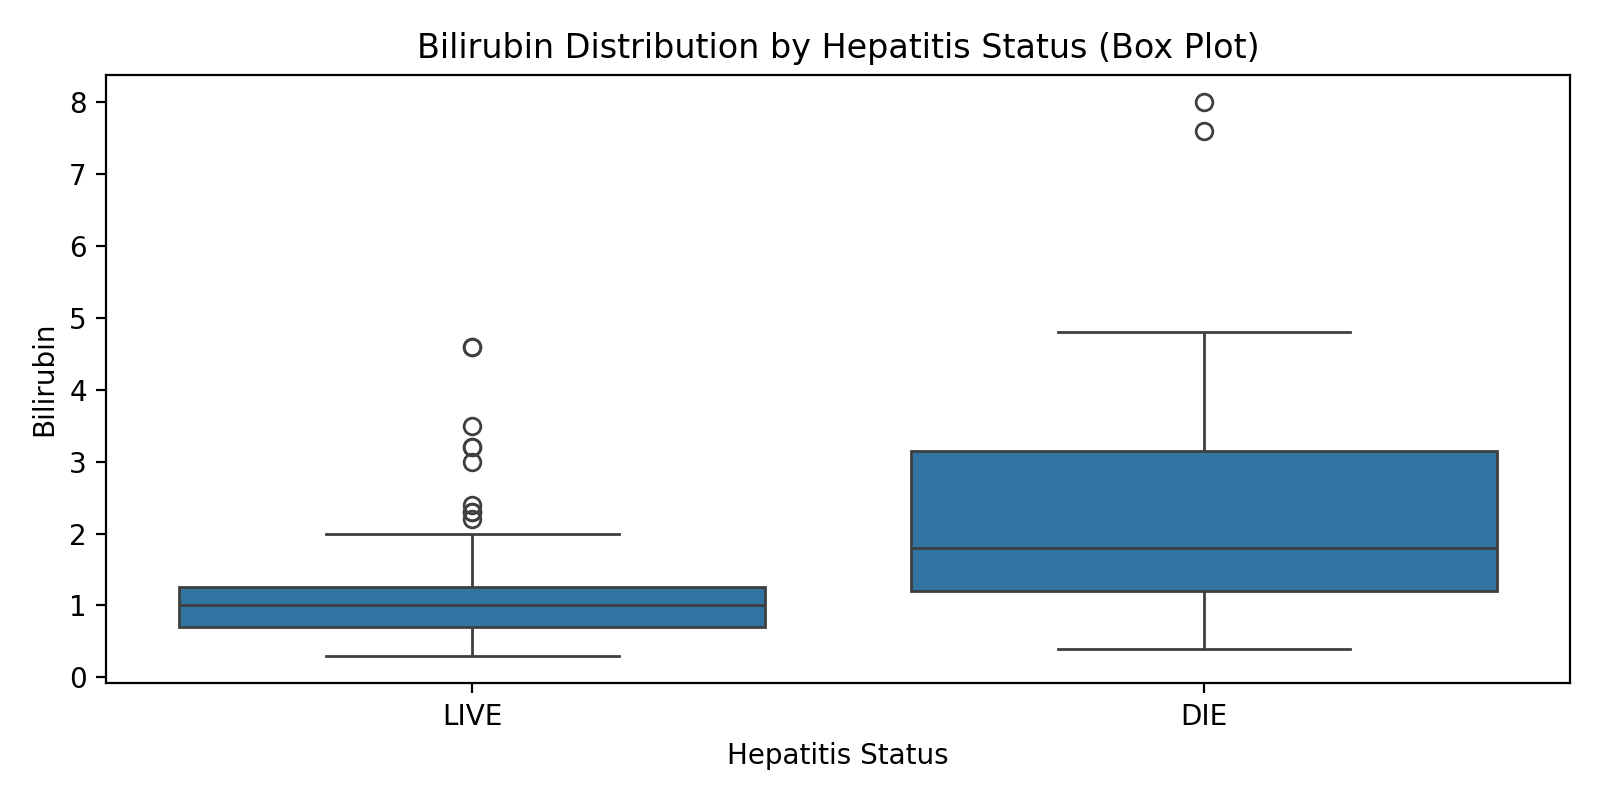

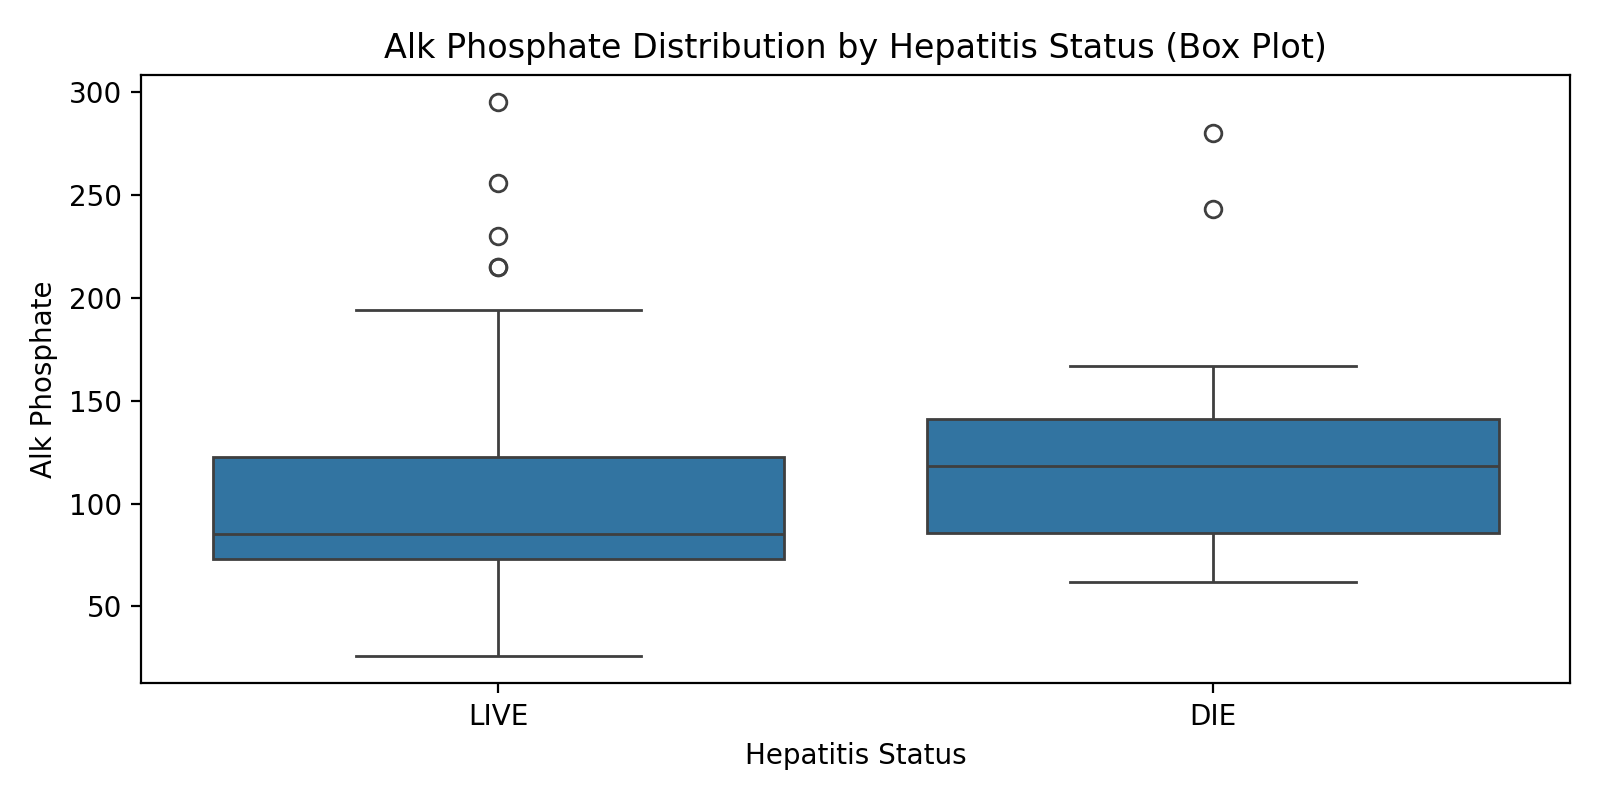

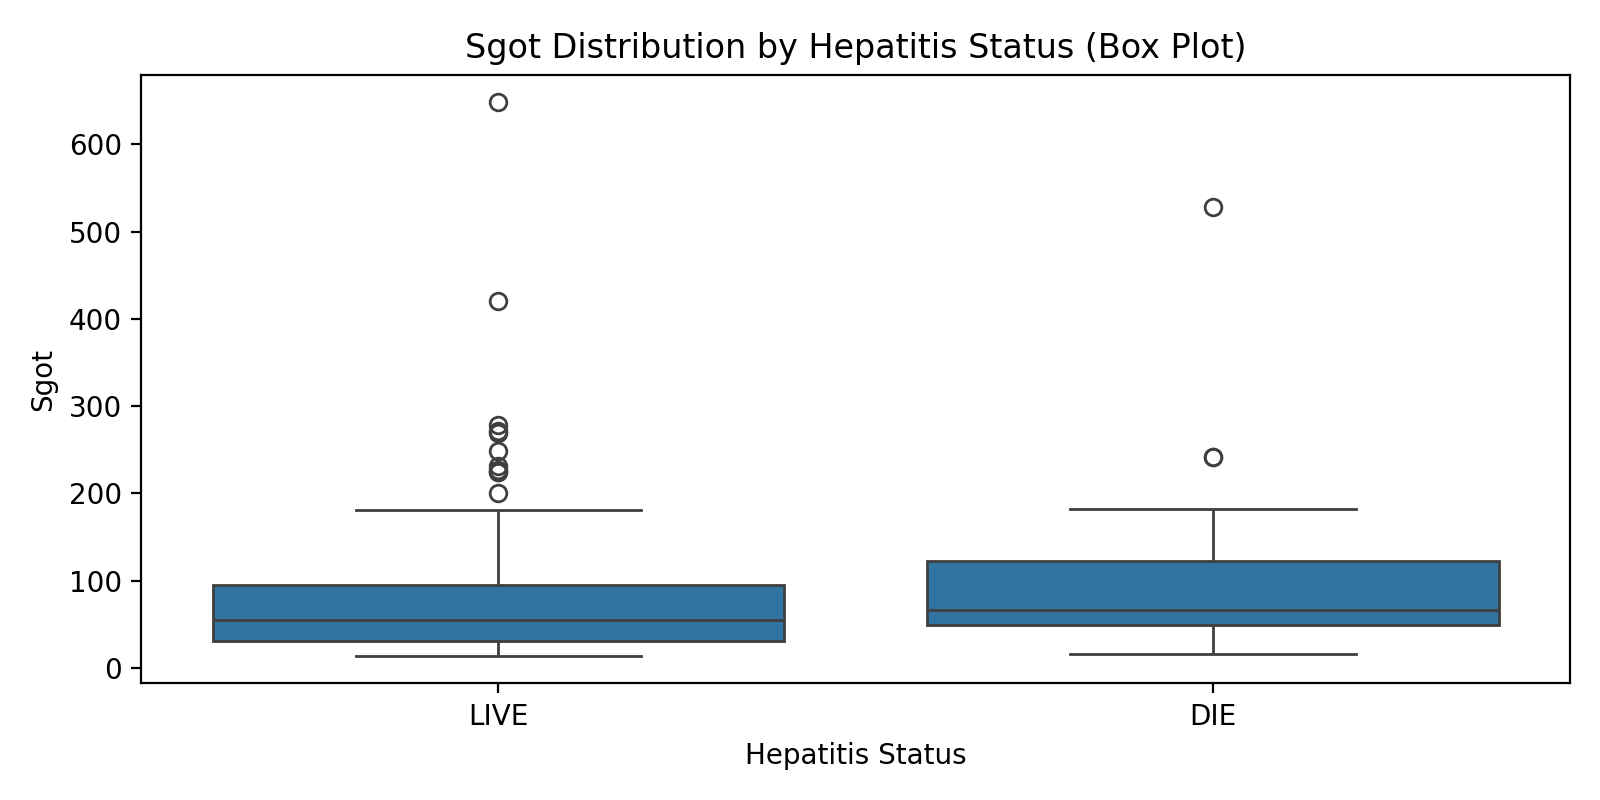

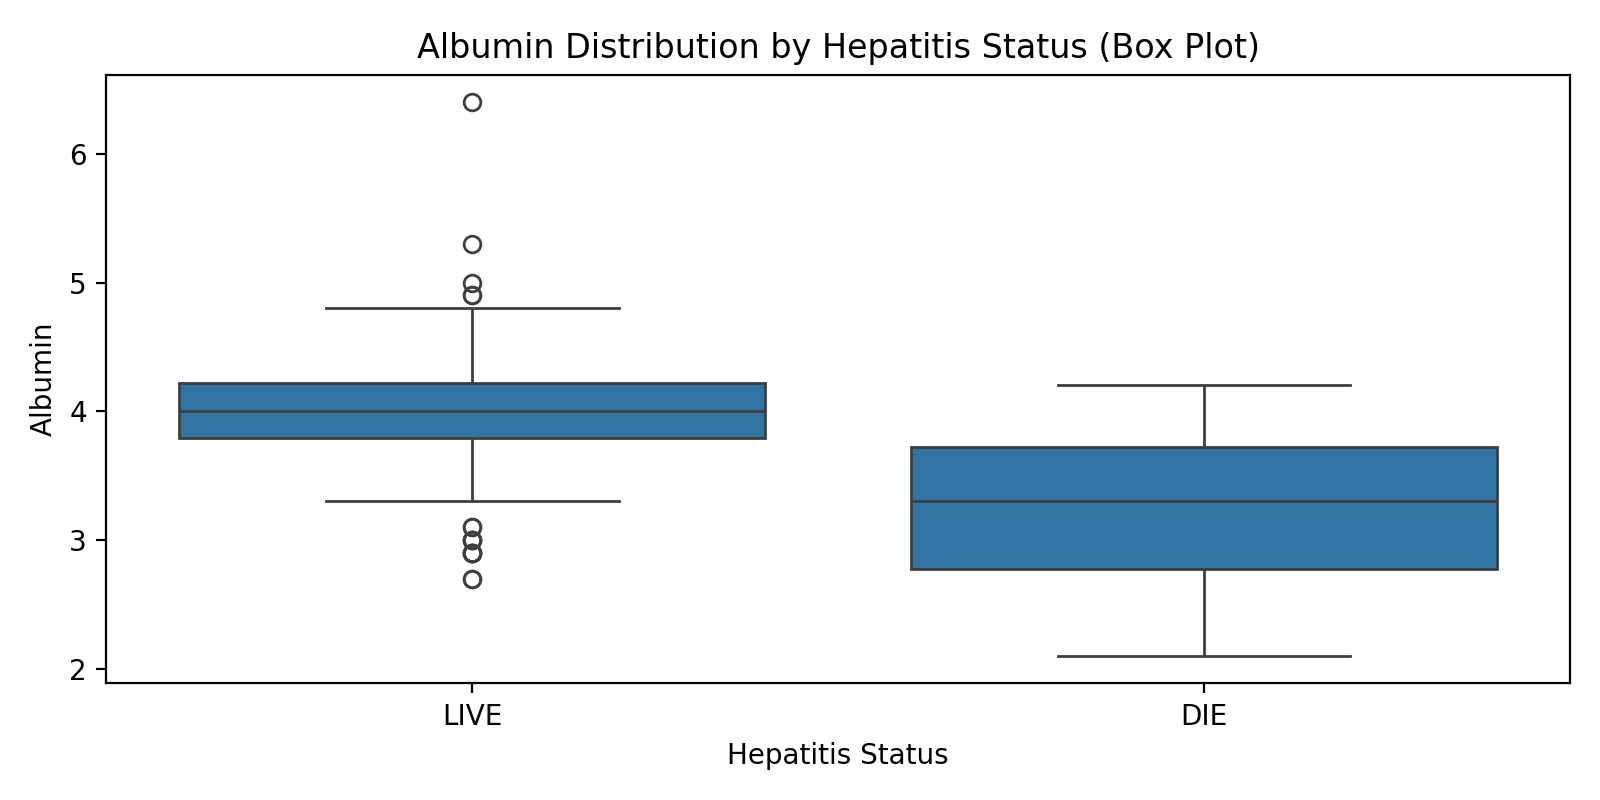

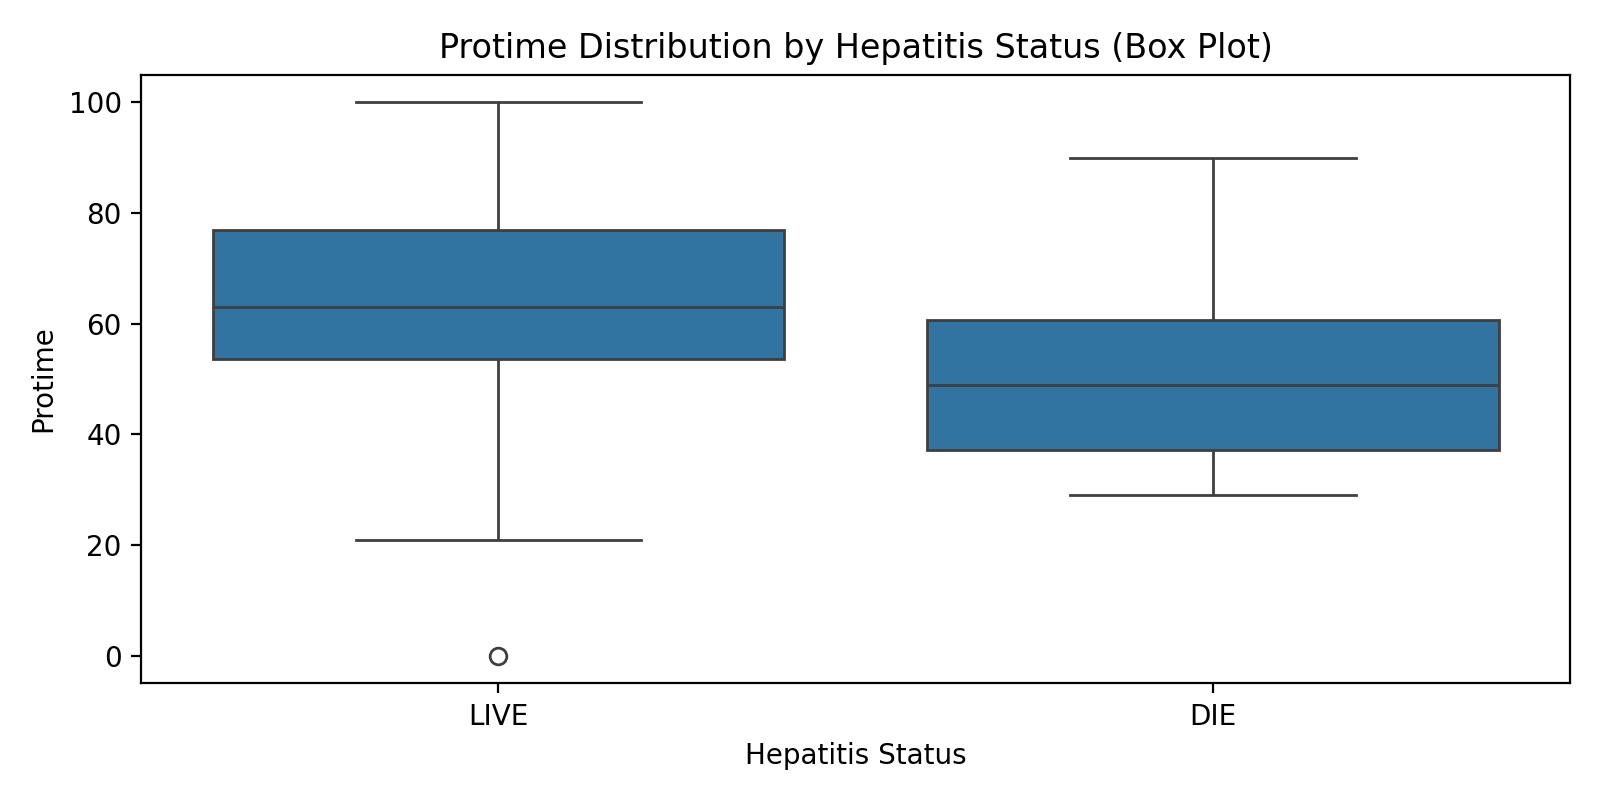

In [ ]:
# Plota gráficos de caixa (box plots) para cada característica contínua em relação ao 'Hepatitis Status'
for column in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Hepatitis Status', y=column, data=hep_data)
    plt.title(f'{column} Distribution by Hepatitis Status (Box Plot)')
    plt.xlabel('Hepatitis Status')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

### **Observações:**

**Distribuição de Idades por Status de Hepatite (Hepatitis Status):**
- A idade mediana para o grupo 'DIE' é ligeiramente menor do que para o grupo 'LIVE'.
- Ambos os grupos têm uma faixa etária similar, conforme indicado pela extensão das caixas e os bigodes.
- A idade sozinha não é um diferenciador forte em termos de desfechos de hepatite entre os dois grupos.

**Distribuição de Bilirrubina por Status de Hepatite (Hepatitis Status):**
- O nível mediano de bilirrubina (Bilirubin) é mais alto no grupo 'DIE' em comparação com o grupo 'LIVE'.
- O grupo 'DIE' tem uma faixa interquartil mais ampla, indicando mais variabilidade nos níveis de bilirrubina.
- Há mais outliers no grupo 'LIVE', com alguns valores extremos de bilirrubina.
- Níveis mais altos de bilirrubina são tipicamente associados a uma pior função hepática, o que pode estar correlacionado a um risco mais alto de mortalidade.

**Distribuição de Fosfatase Alcalina por Status de Hepatite (Hepatitis Status):**
- O grupo 'LIVE' tem um nível mediano de fosfatase alcalina (Alkaline Phosphate) mais alto em comparação com o grupo 'DIE'.
- A faixa de níveis de fosfatase alcalina no grupo 'LIVE' é mais ampla, indicando maior variabilidade.
- Similar à bilirrubina, há vários outliers no grupo 'LIVE' para os níveis de fosfatase alcalina.

**Distribuição de SGOT por Status de Hepatite (Hepatitis Status):**
- O nível mediano de SGOT para o grupo 'DIE' parece comparável ao do grupo 'LIVE'.
- O grupo 'LIVE' mostra uma faixa mais ampla de níveis de SGOT, conforme indicado pelos bigodes mais longos e um número maior de outliers.
- SGOT é uma enzima que pode indicar dano hepático quando elevada, então a faixa mais ampla e os outliers no grupo 'LIVE' podem ser de interesse para investigação clínica adicional.

**Distribuição de Albumina por Status de Hepatite (Hepatitis Status):**
- O grupo 'LIVE' tem um valor mediano de albumina (Albumin) mais alto do que o grupo 'DIE'.
- Os níveis de albumina dentro do grupo 'DIE' mostram menos variação, e há outliers tanto nas extremidades inferior quanto superior.
- Albumina é uma proteína produzida pelo fígado, e níveis mais baixos podem sugerir pior função hepática. Os valores medianos mais baixos e os outliers no grupo 'DIE' podem indicar disfunção hepática mais severa.

**Distribuição de Protime por Status de Hepatite (Hepatitis Status):**
- O grupo 'LIVE' tem uma mediana de Protime mais baixa do que o grupo 'DIE'.
- Há um número substancial de outliers no grupo 'DIE' com níveis mais baixos de Protime, enquanto o grupo 'LIVE' tem outliers com níveis mais altos de Protime.
- Protime mede quanto tempo o sangue leva para coagular; prolongado Protime pode ser um sinal de doença hepática, à medida que o fígado produz fatores de coagulação. Os outliers com Protime alto no grupo 'LIVE' podem indicar comprometimento hepático, mas não necessariamente em um grau ameaçador à vida.

## Relação entre Status de Hepatite (Hepatitis Status) e outras variáveis

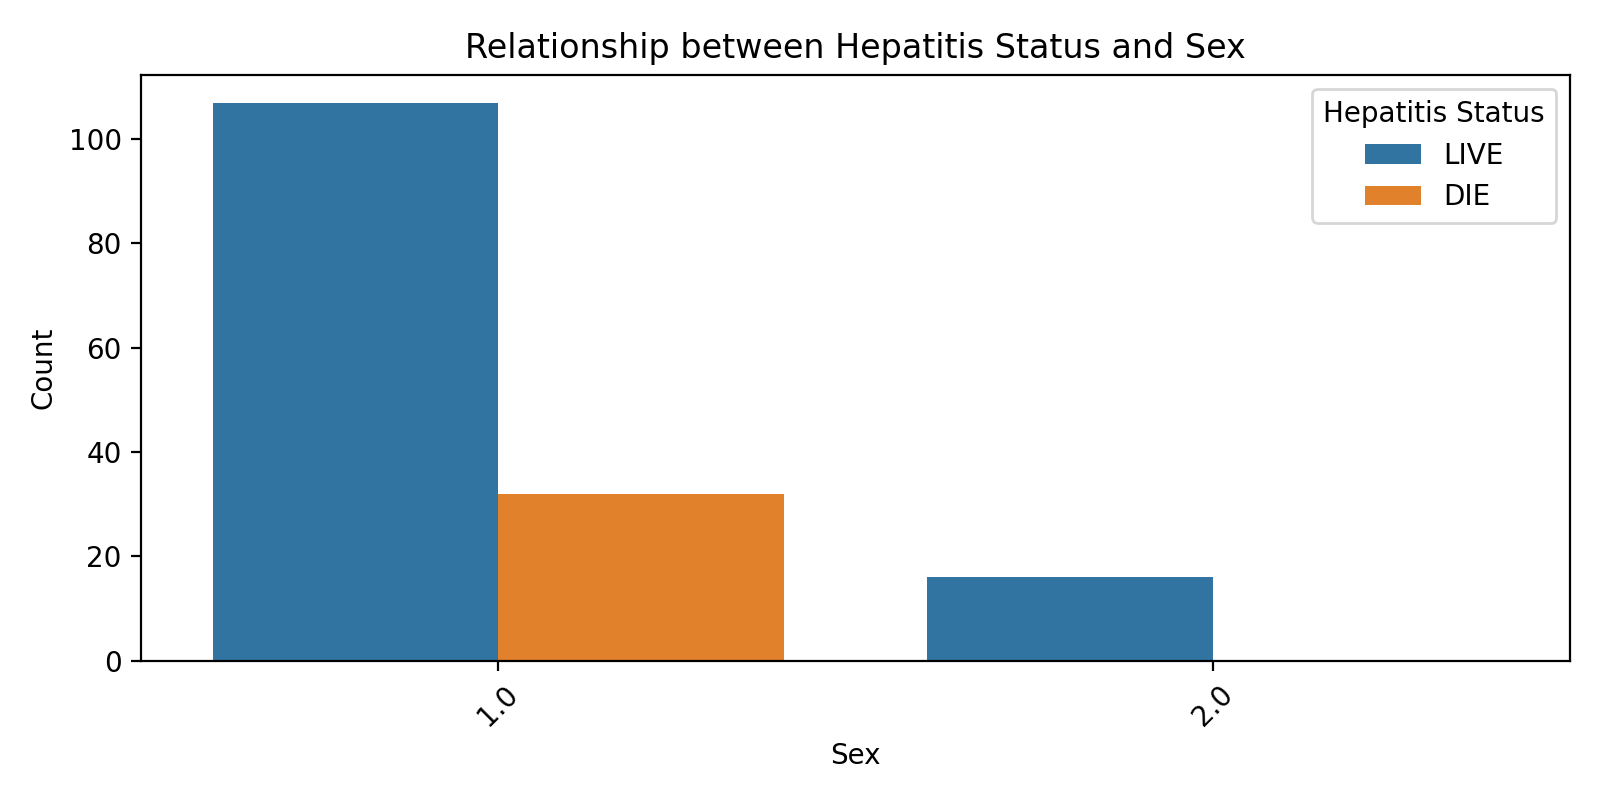

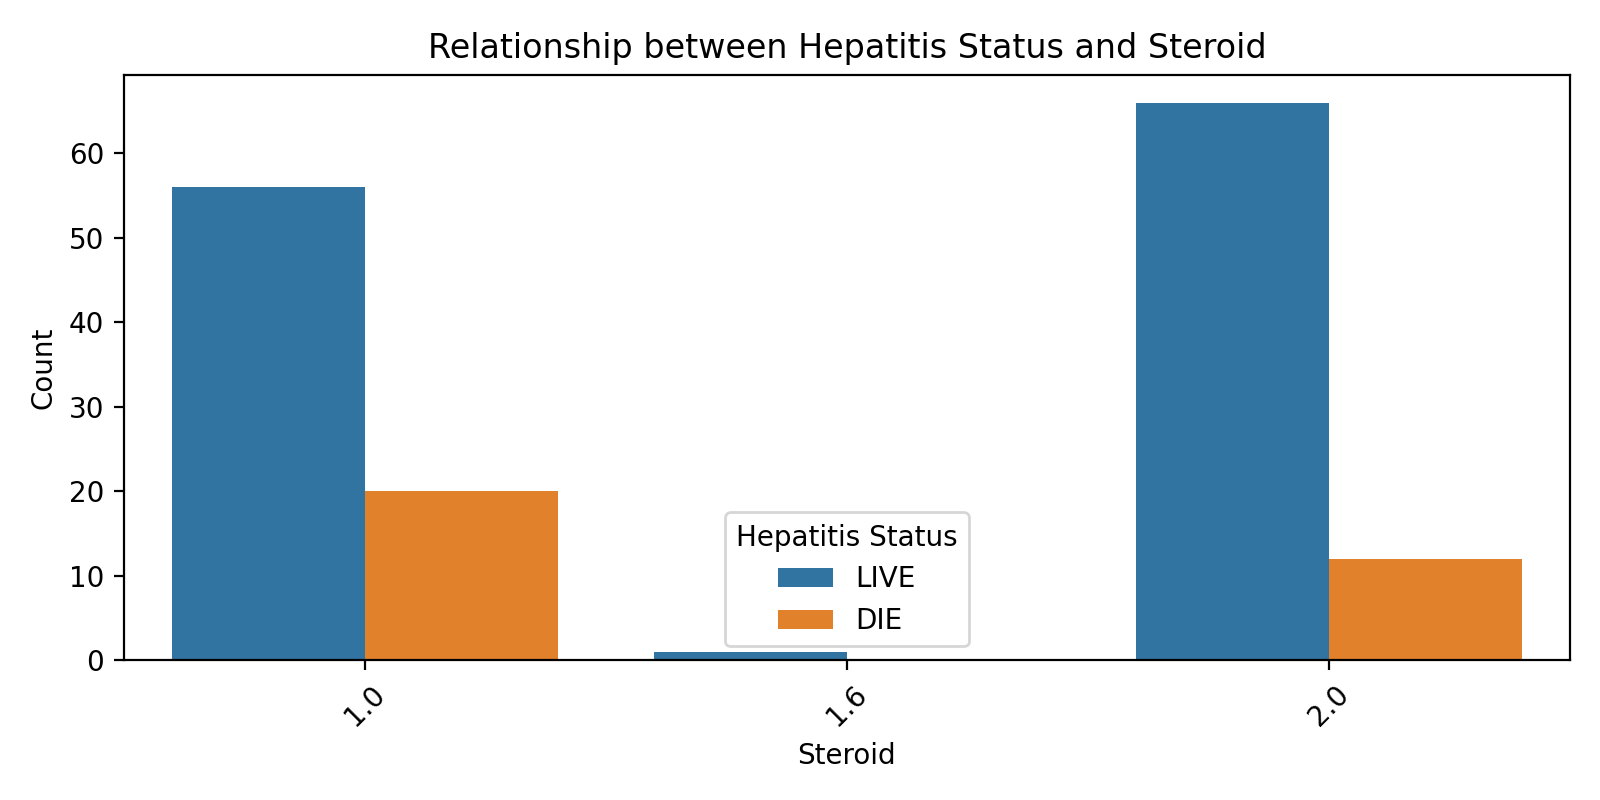

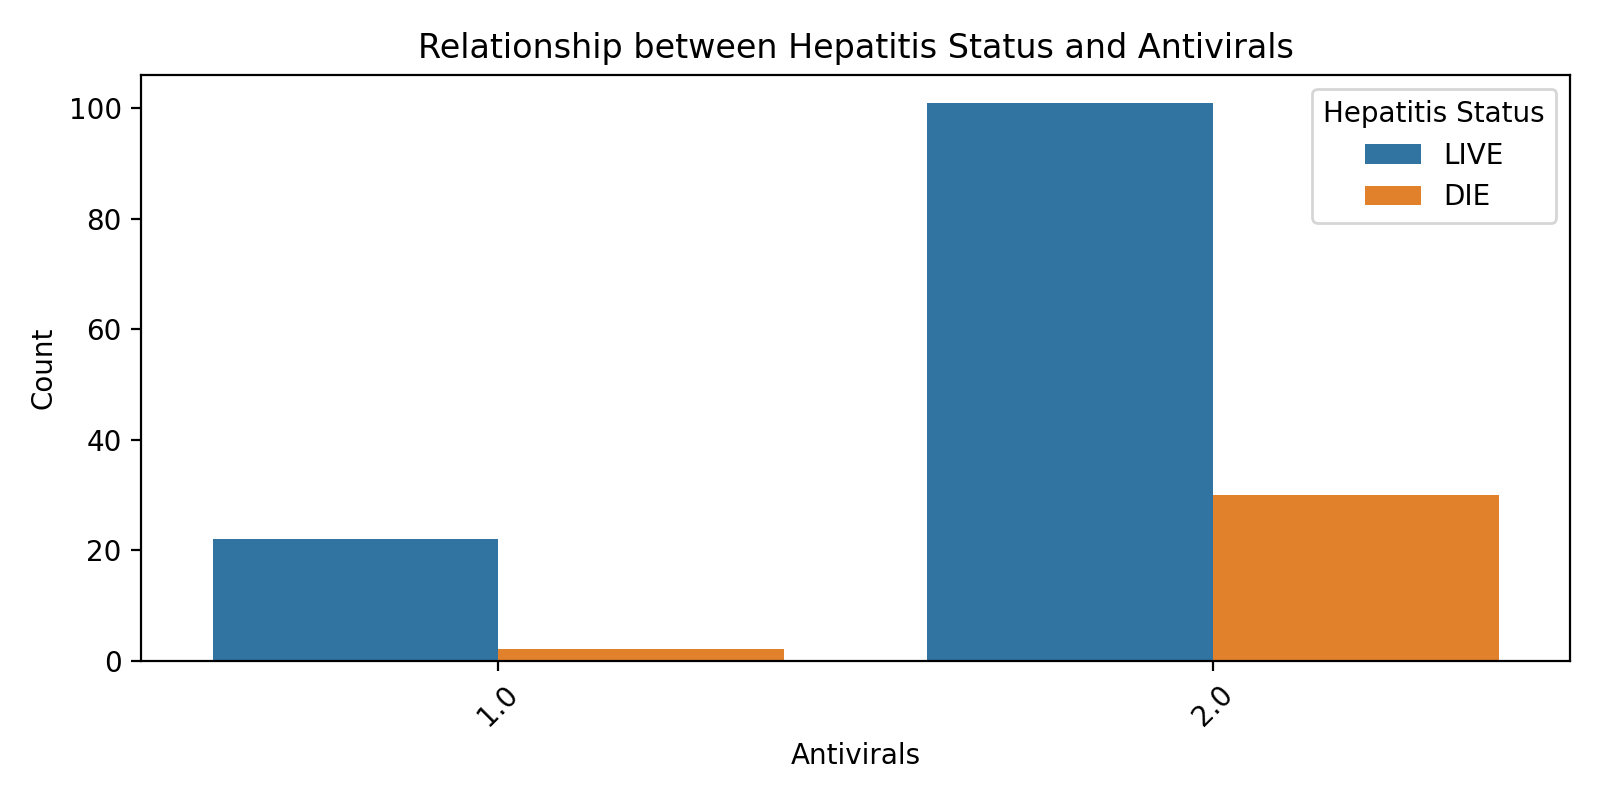

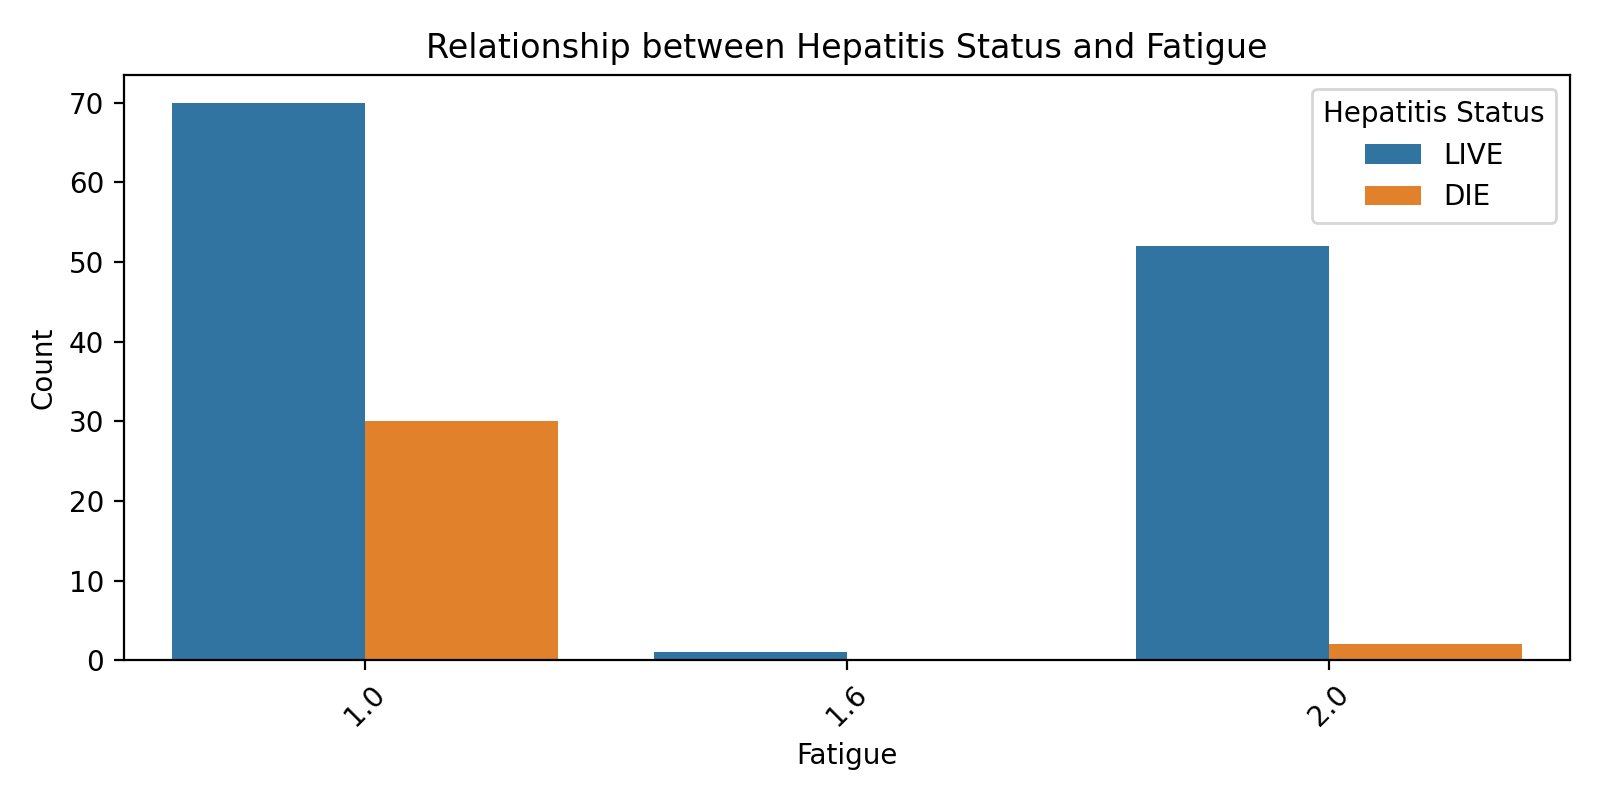

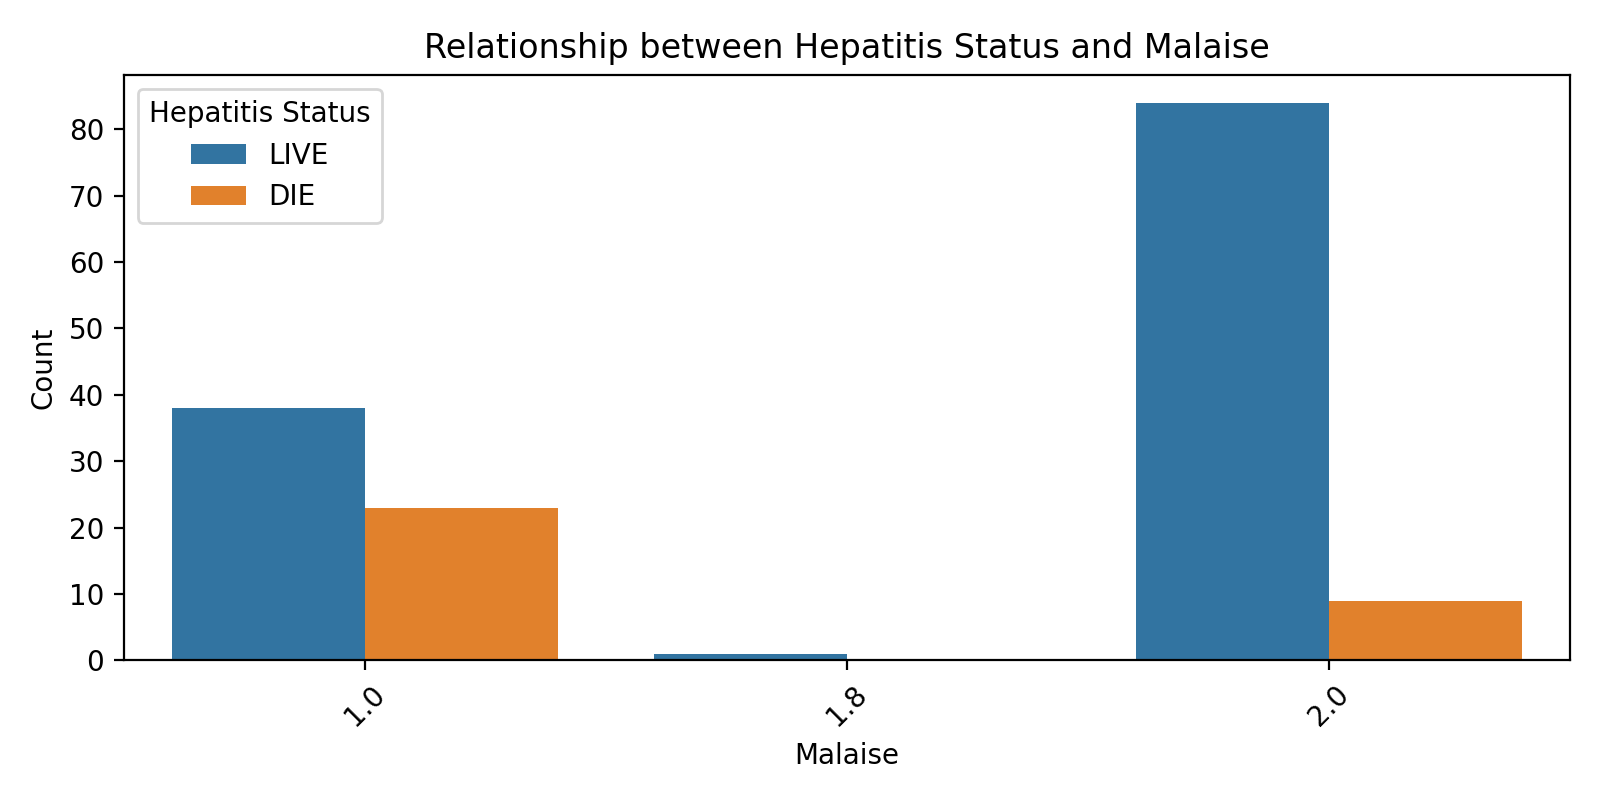

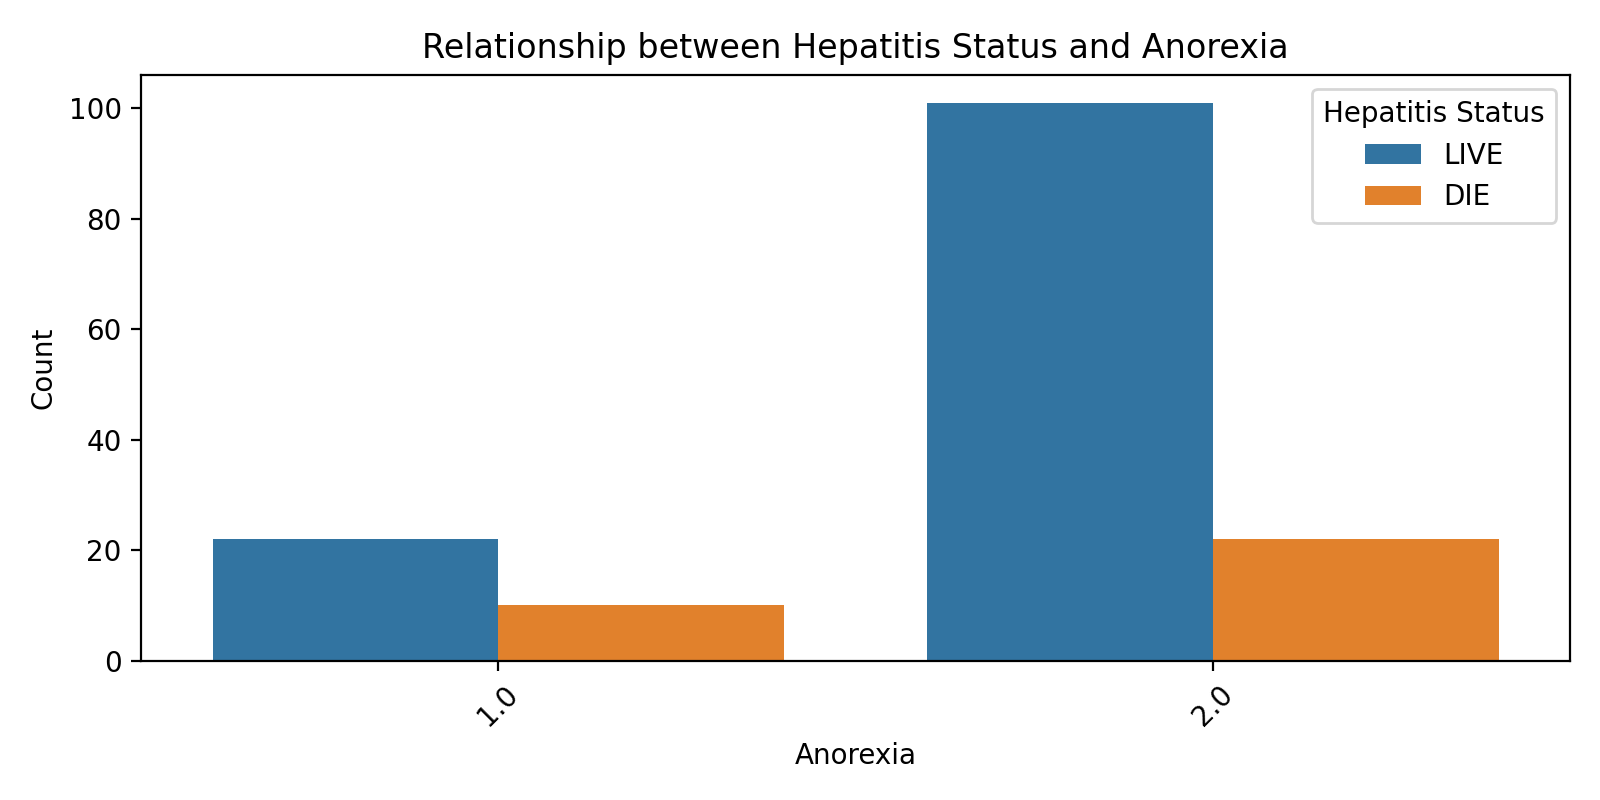

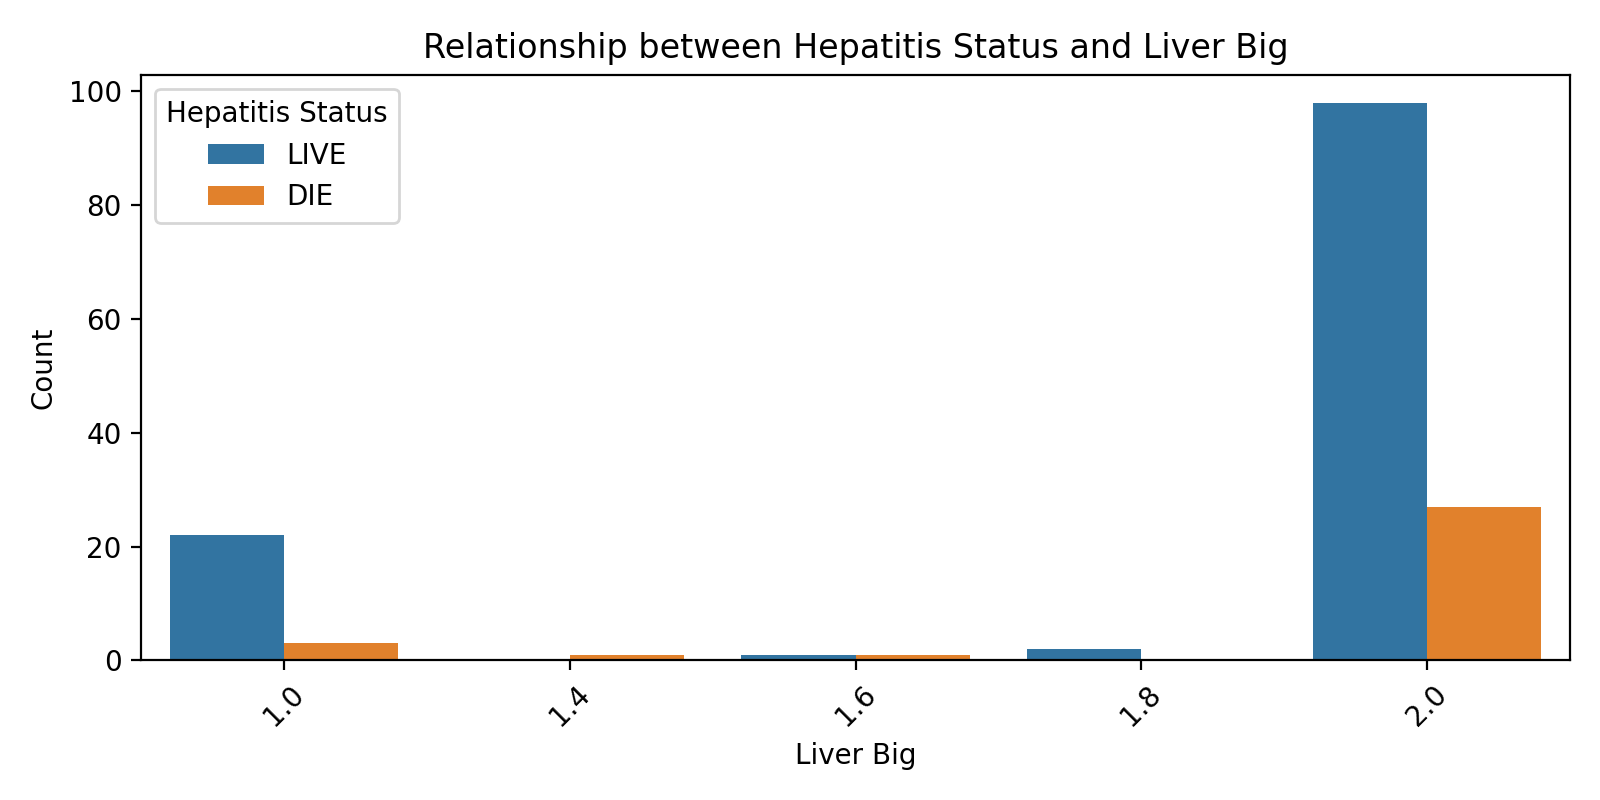

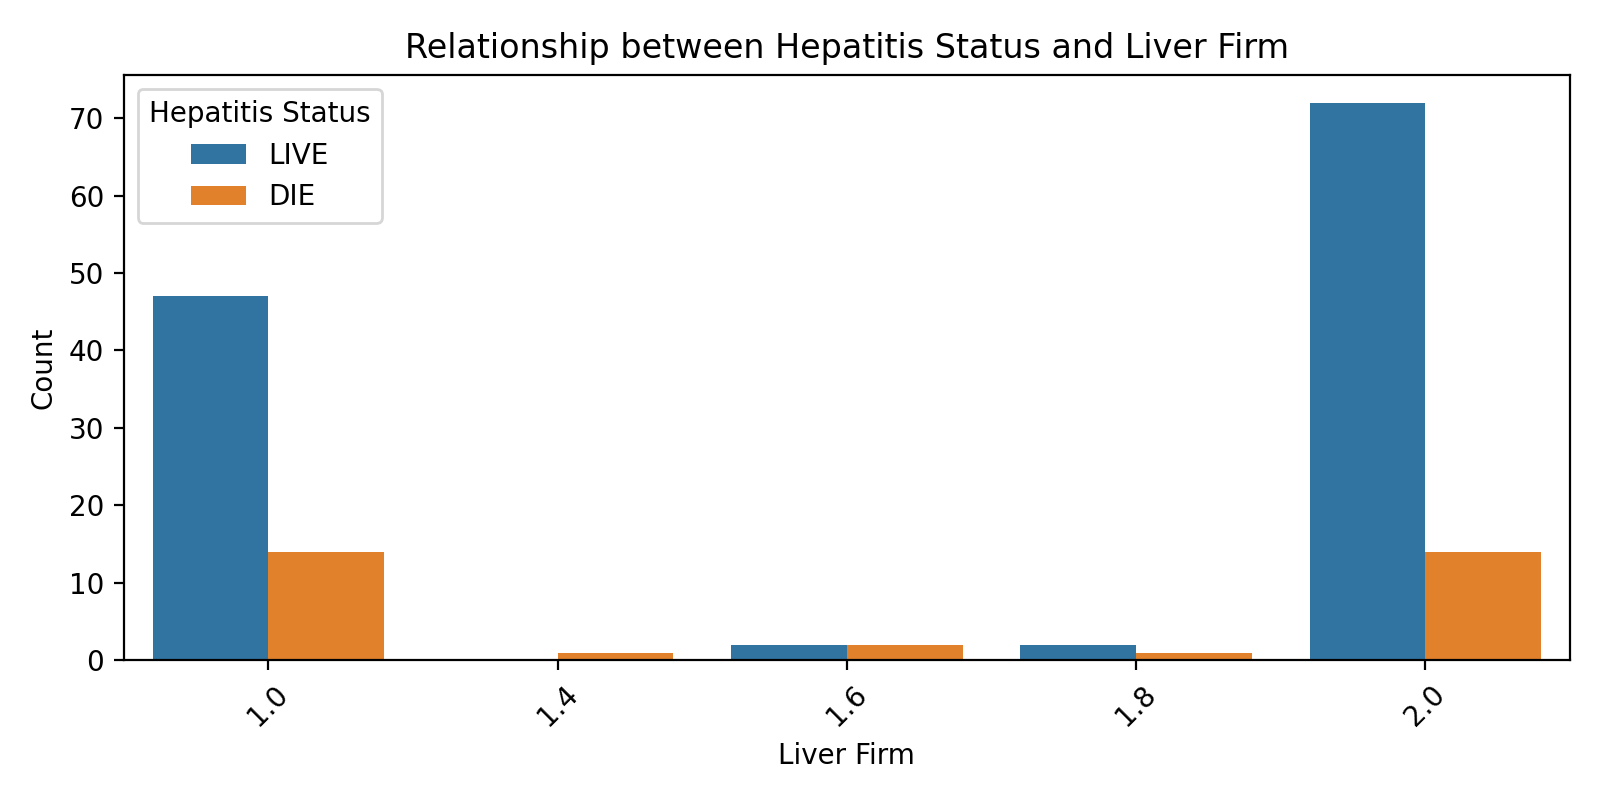

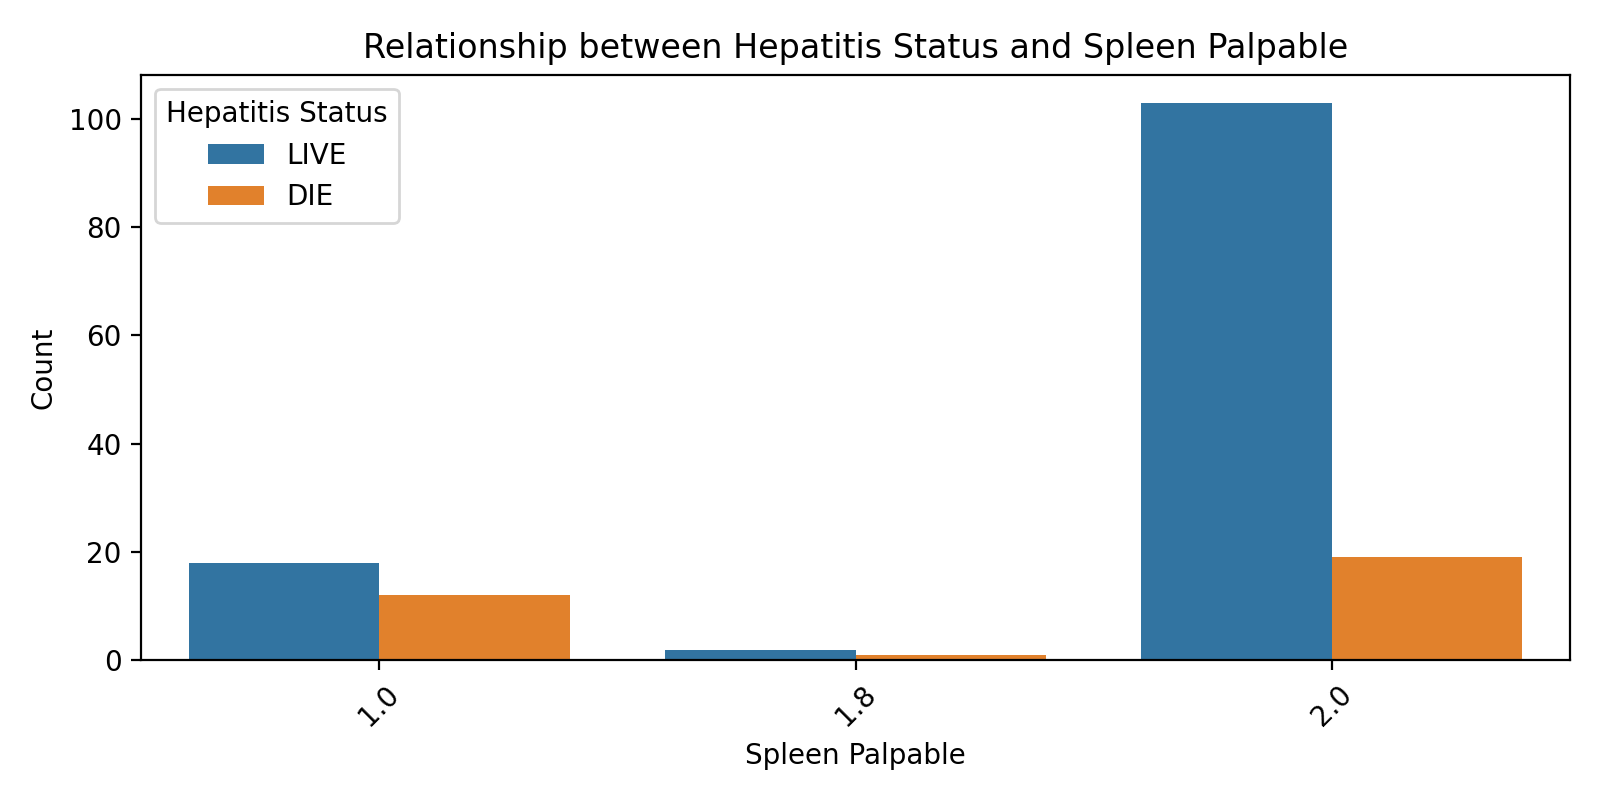

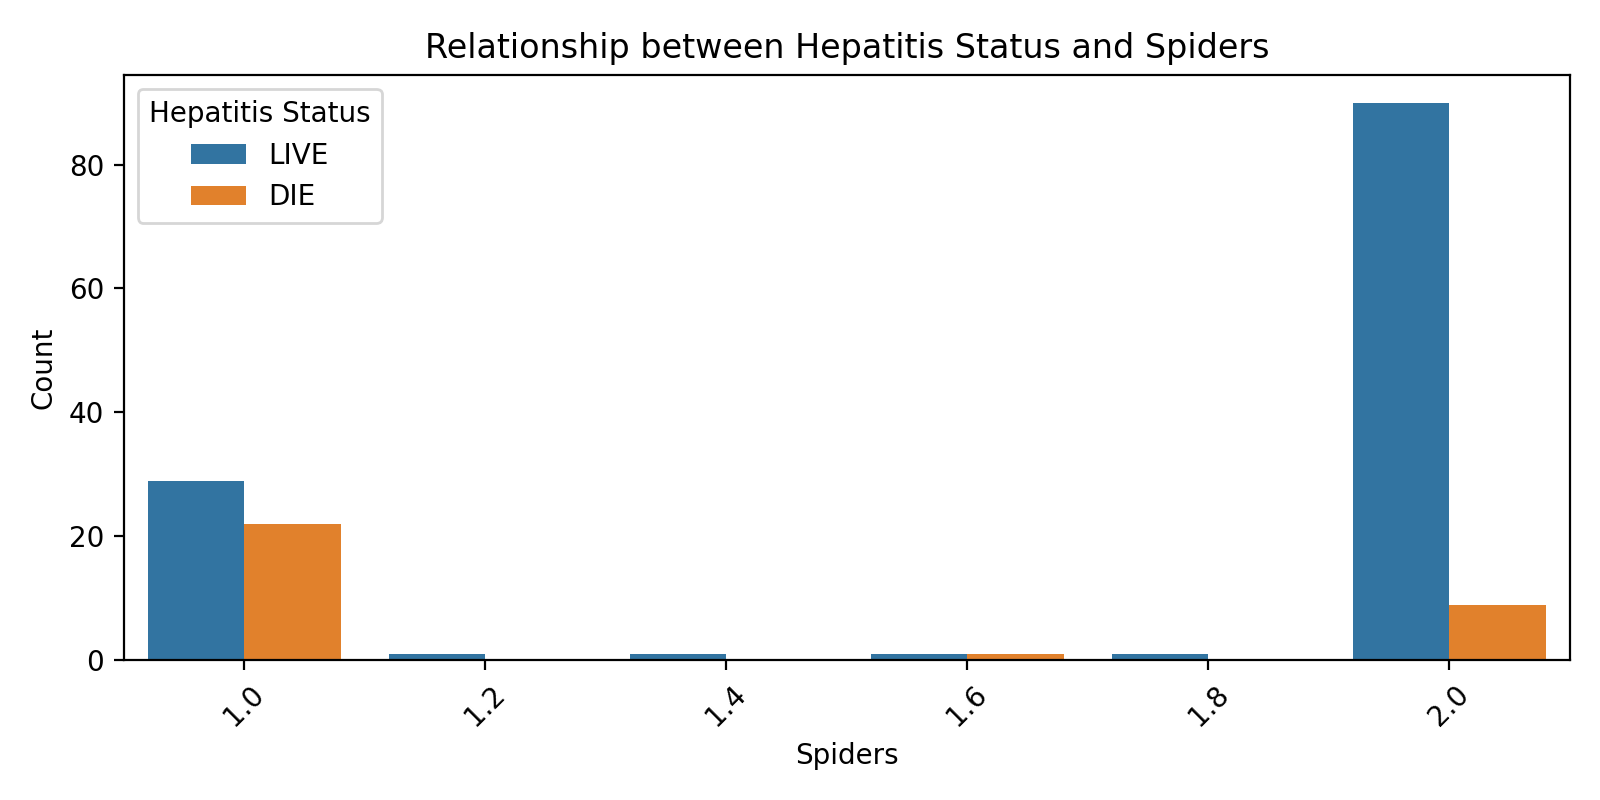

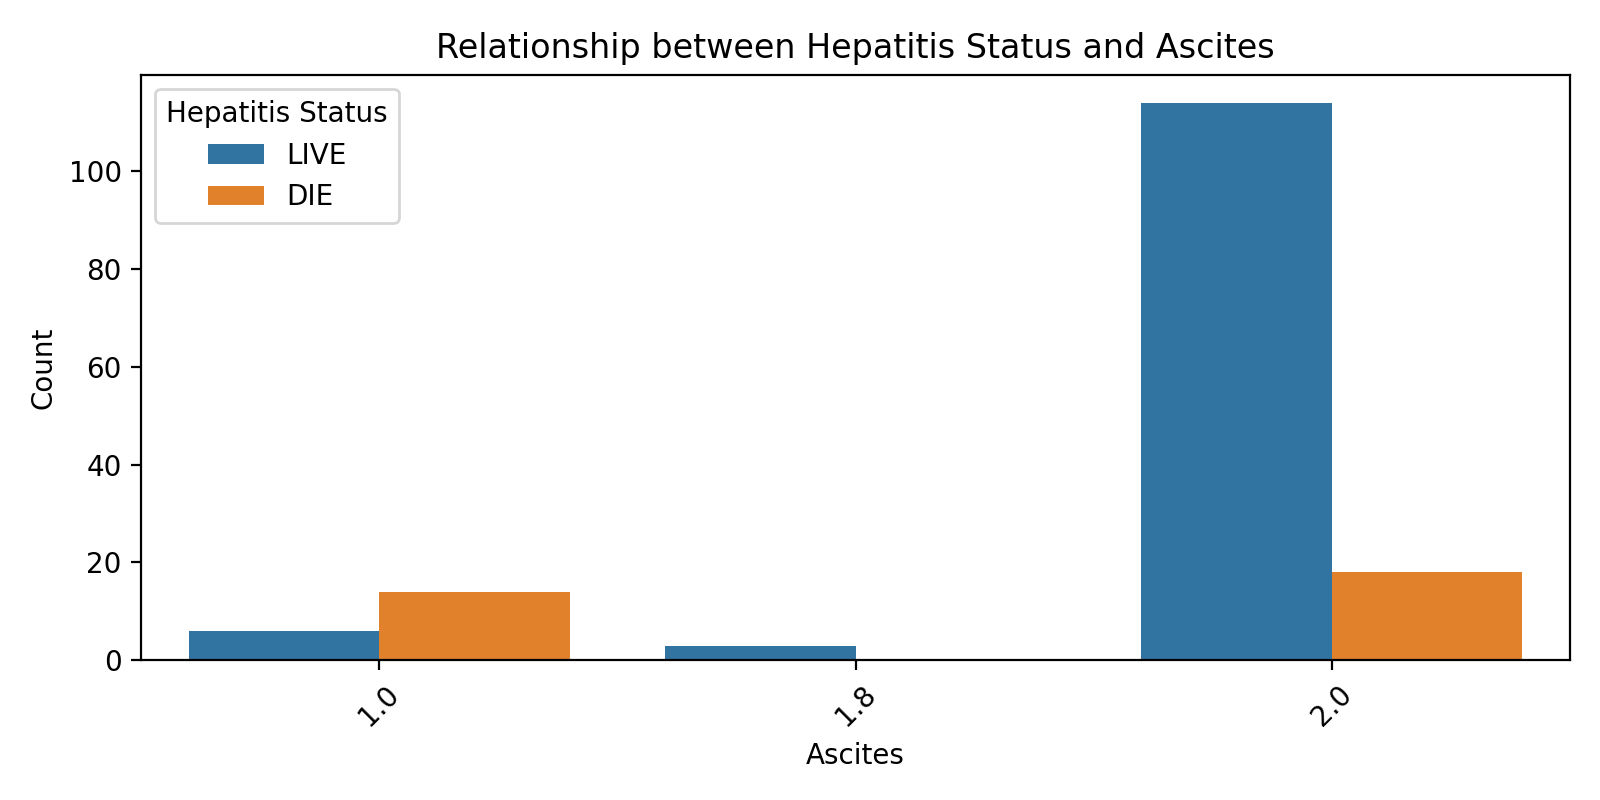

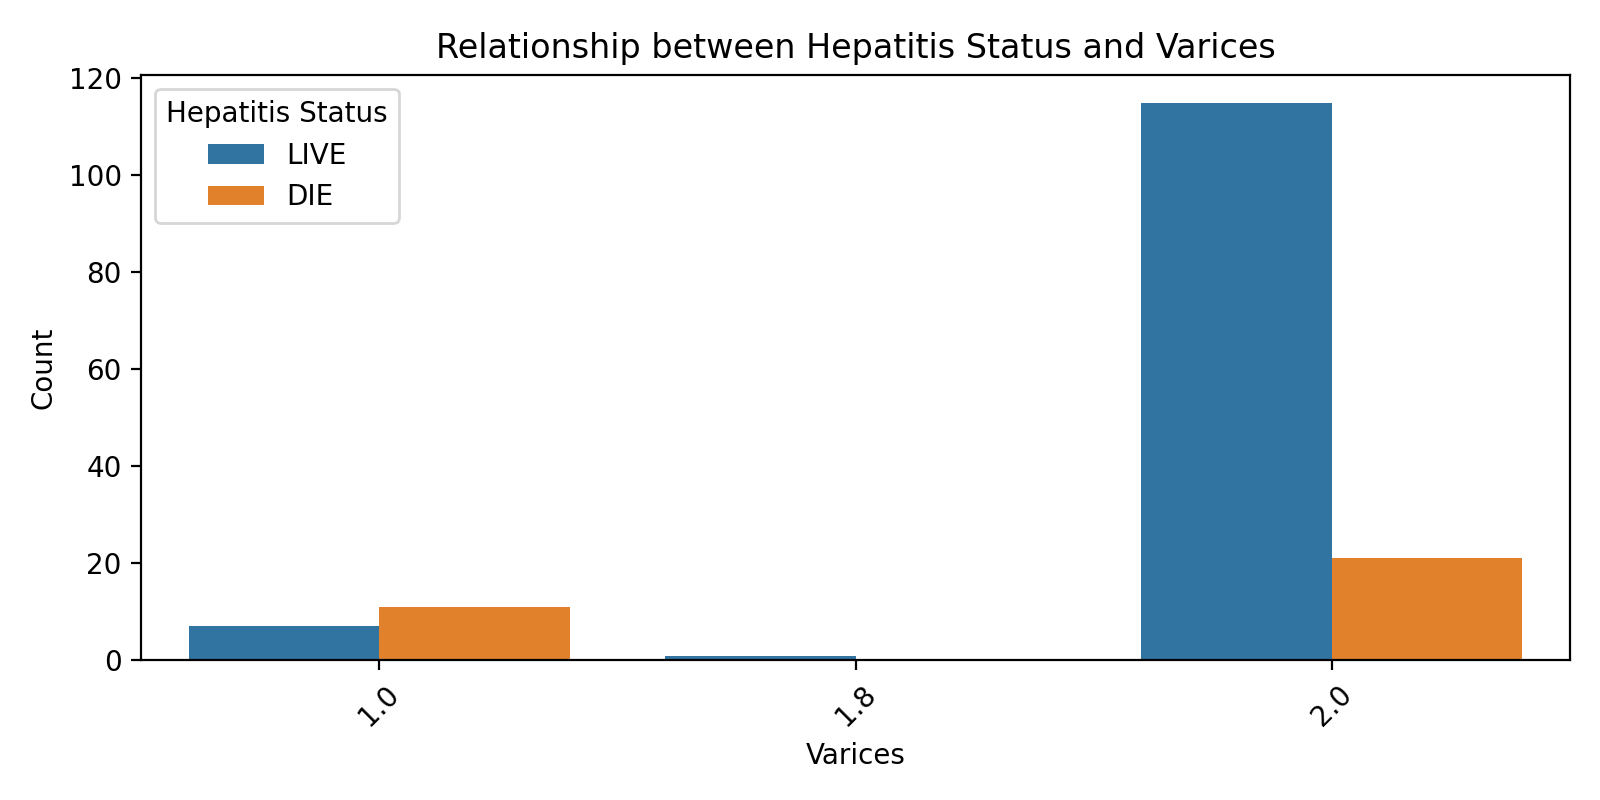

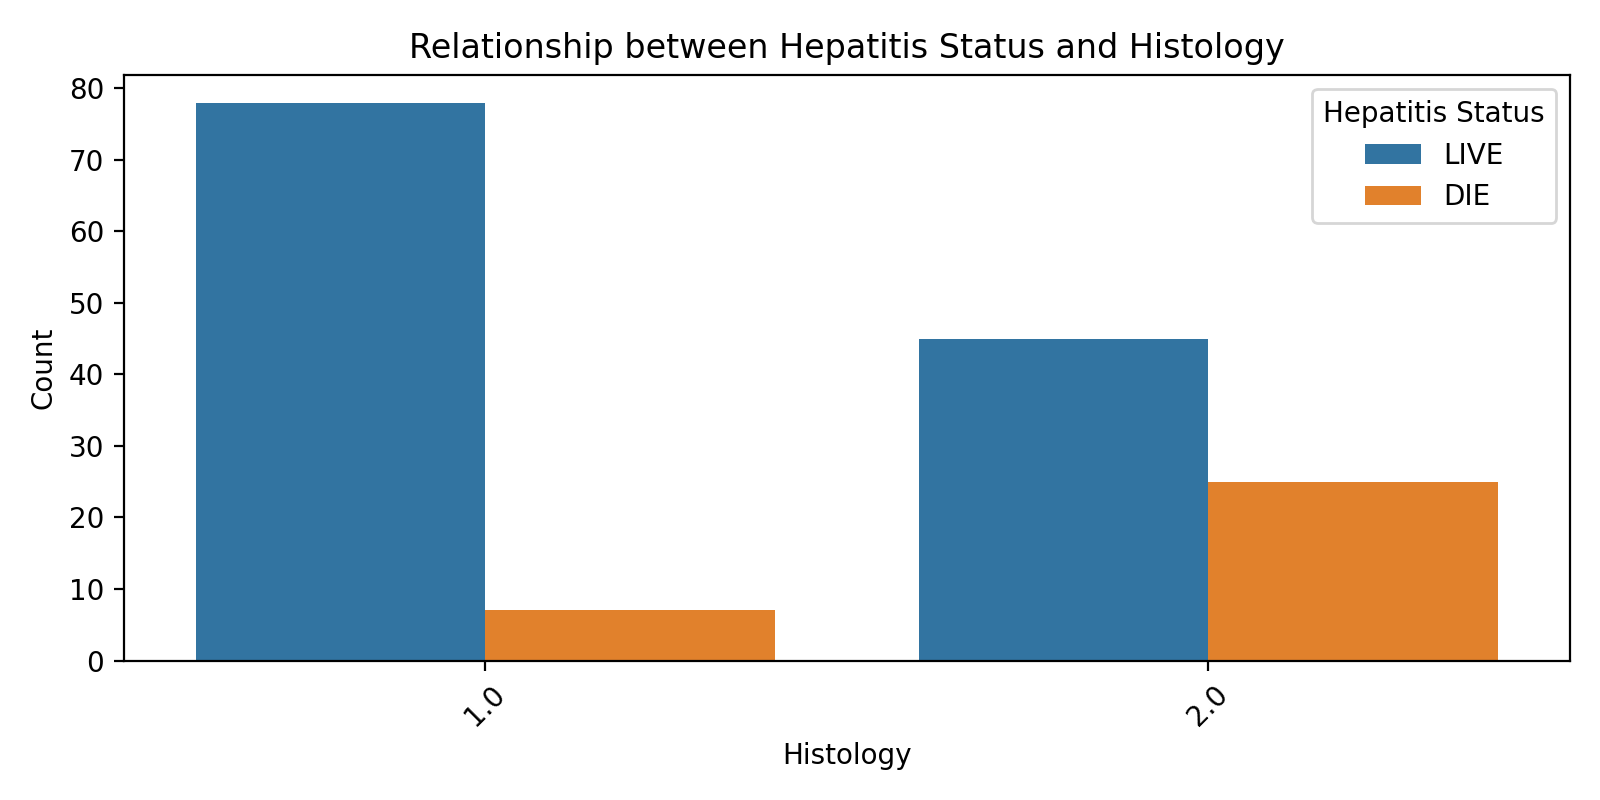

In [ ]:
# Percorre as variáveis categóricas e cria gráficos de contagem com o hue configurado para 'Hepatitis Status'
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=hep_data, hue='Hepatitis Status')
    plt.title(f'Relationship between Hepatitis Status and {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend(title='Hepatitis Status')
    plt.show()

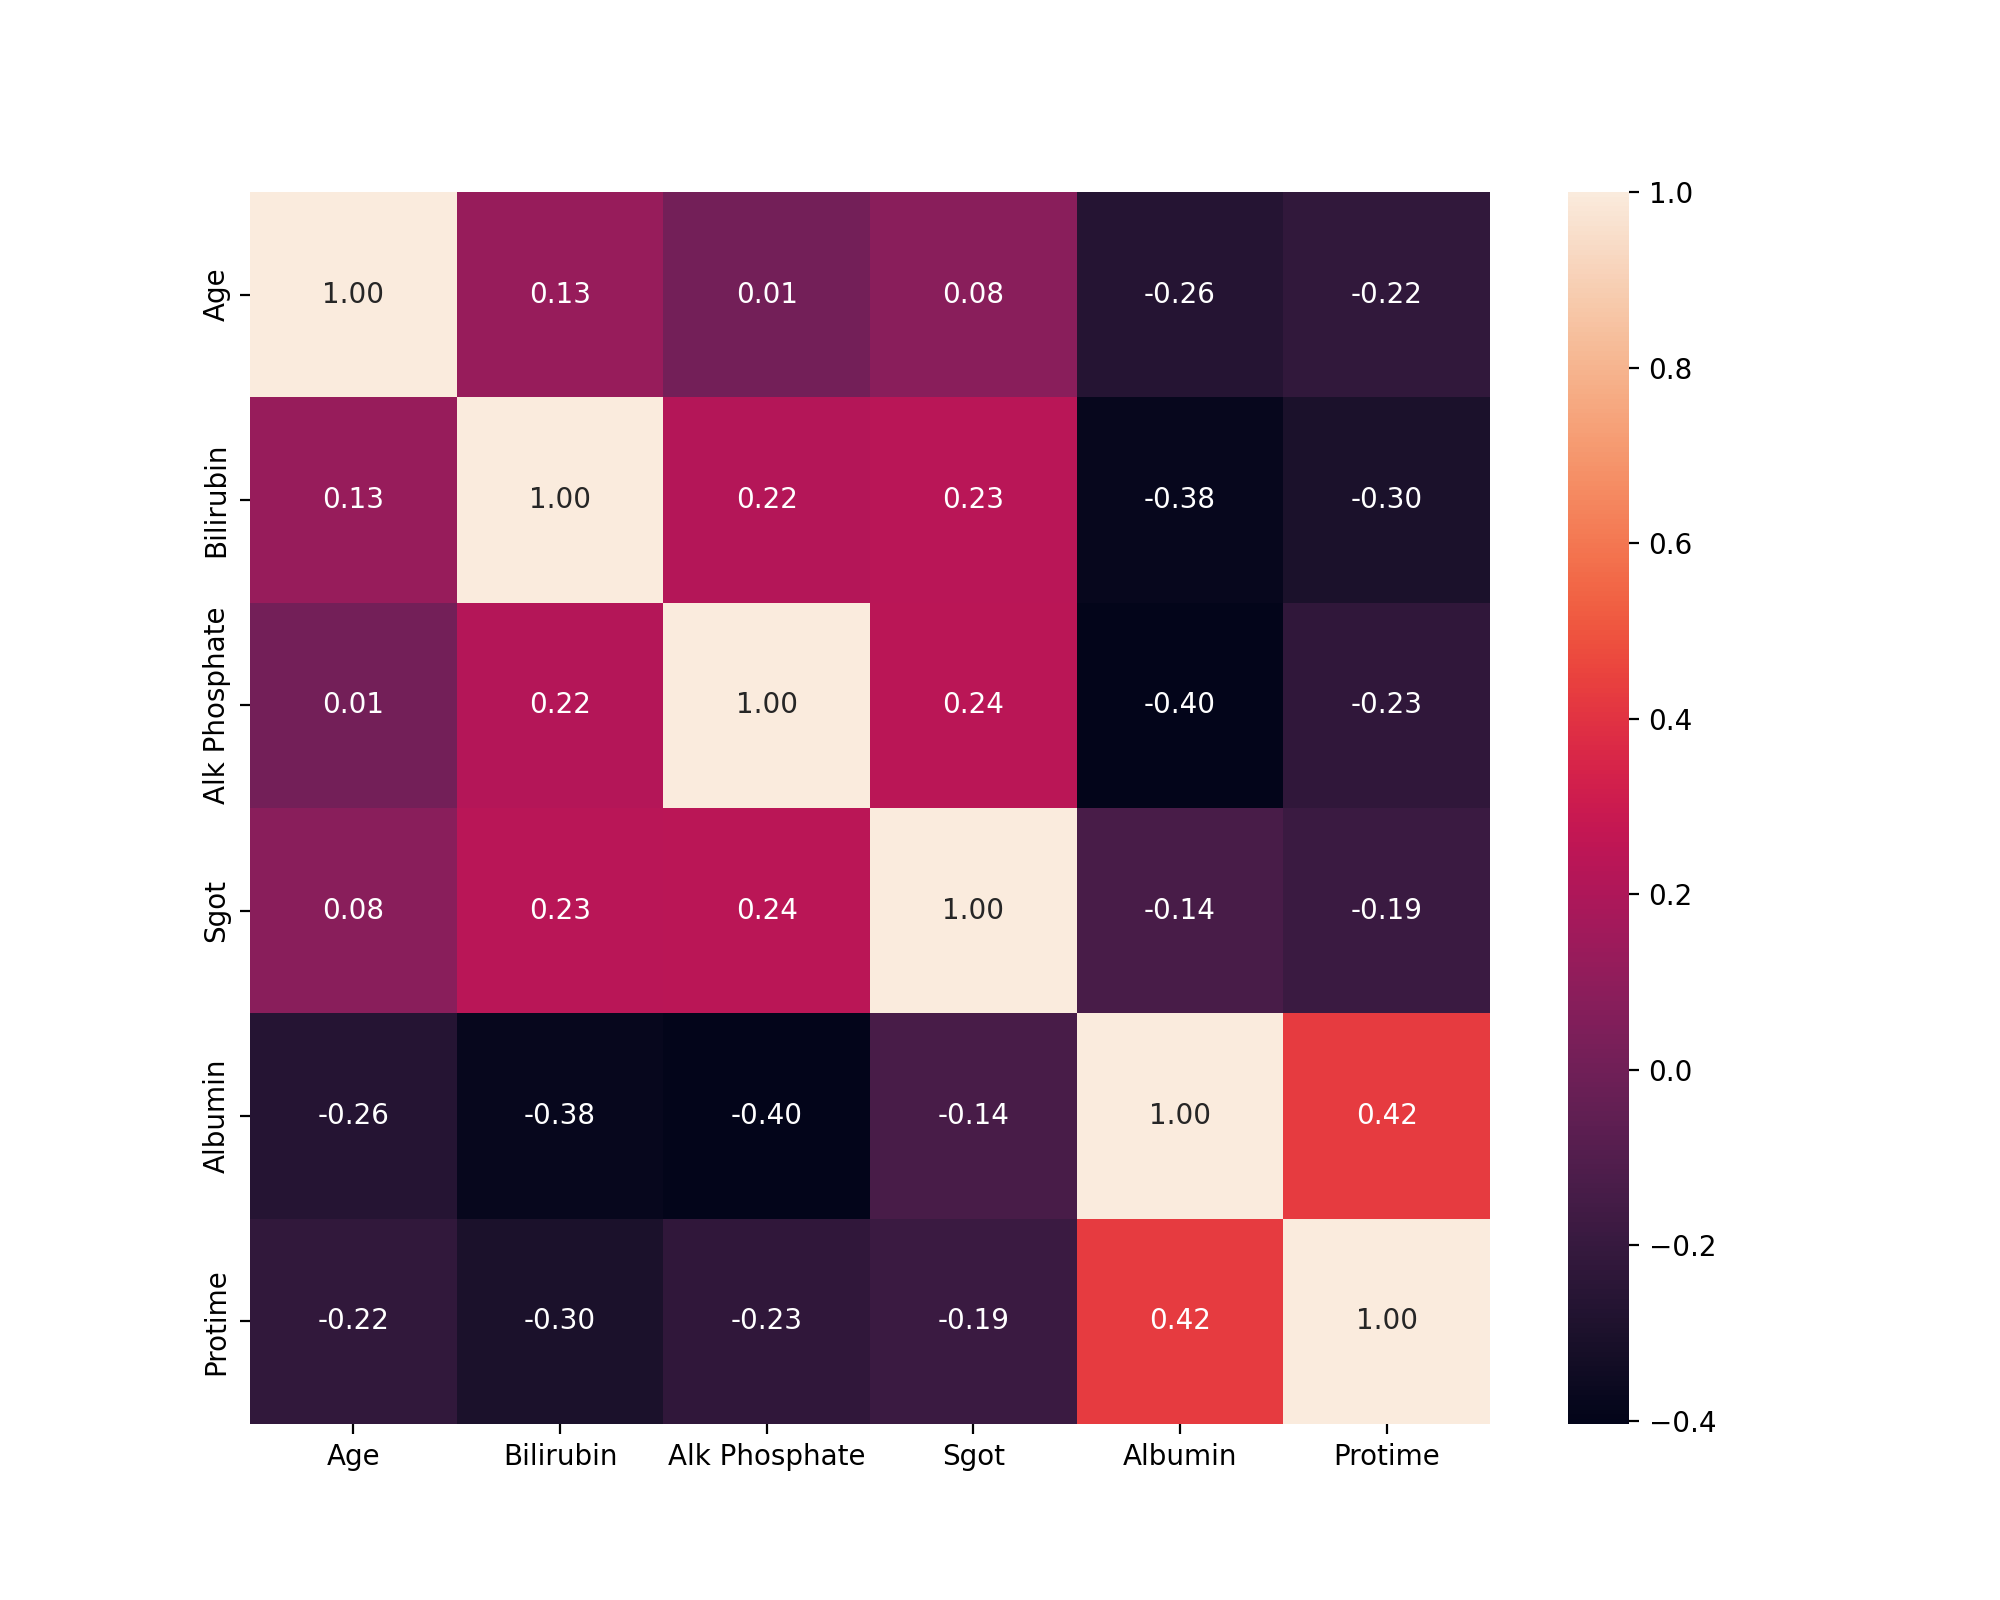

In [ ]:
# Gera uma matriz de correlação para variáveis contínuas (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(data[continuous_cols].corr(), annot=True, fmt=".2f")
plt.show()

## Gráficos de dispersão

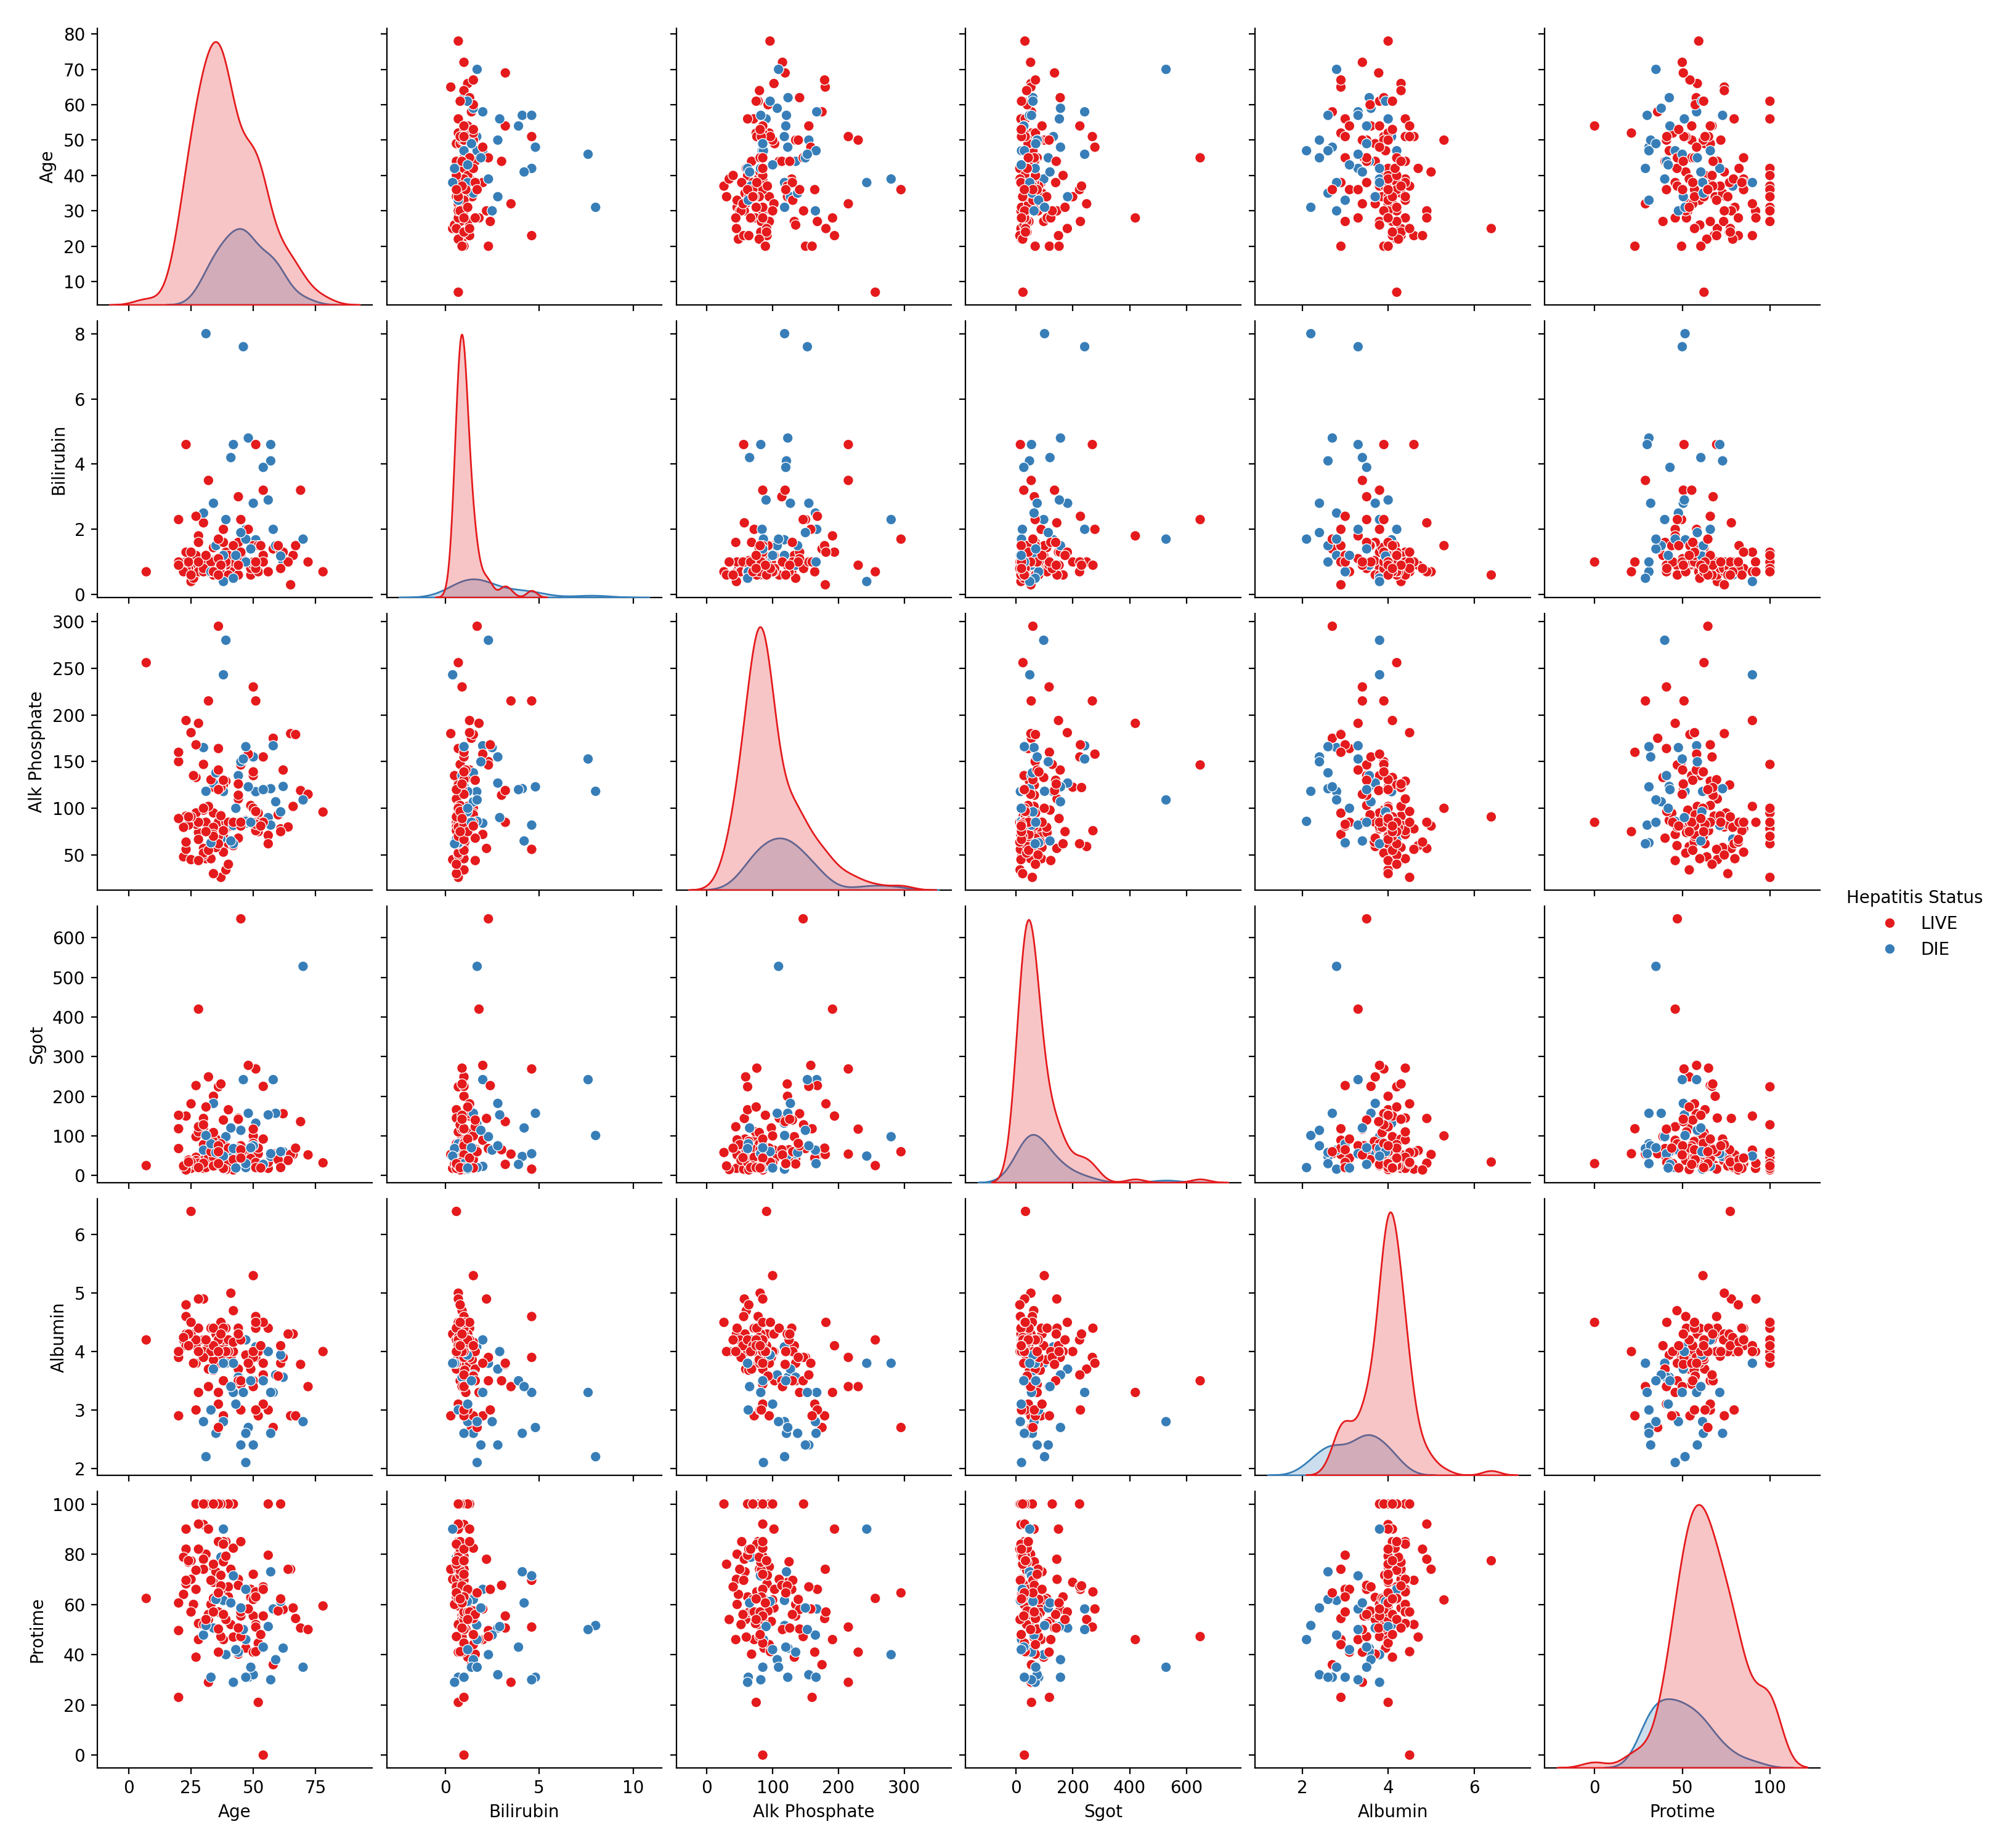

In [ ]:
# Cria gráficos de dispersão (pairplots) para variáveis contínuas com o hue configurado para 'Hepatitis Status'
sns.pairplot(hep_data, vars=continuous_cols, hue='Hepatitis Status', palette="Set1")
plt.show()

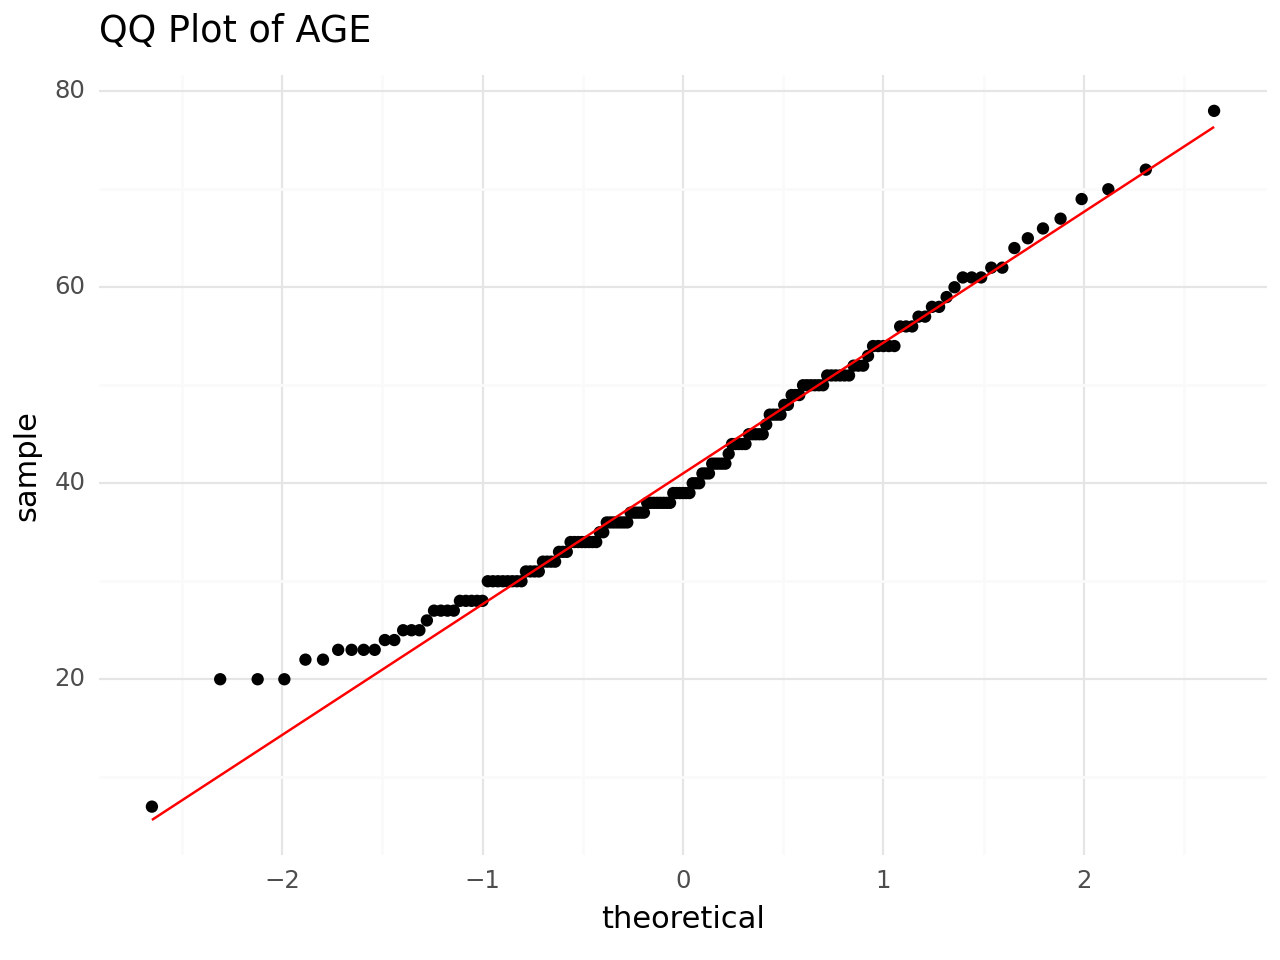

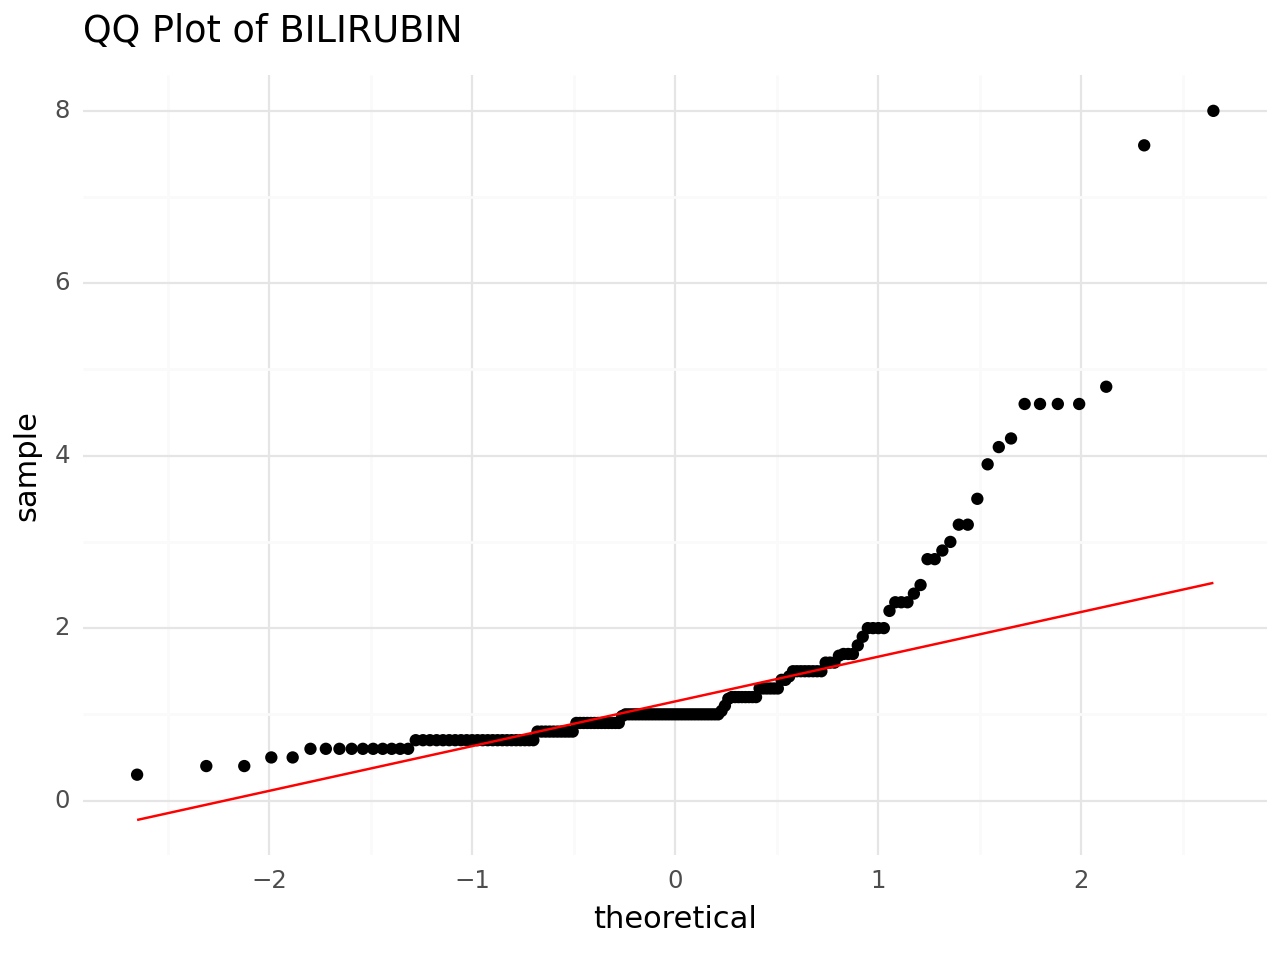

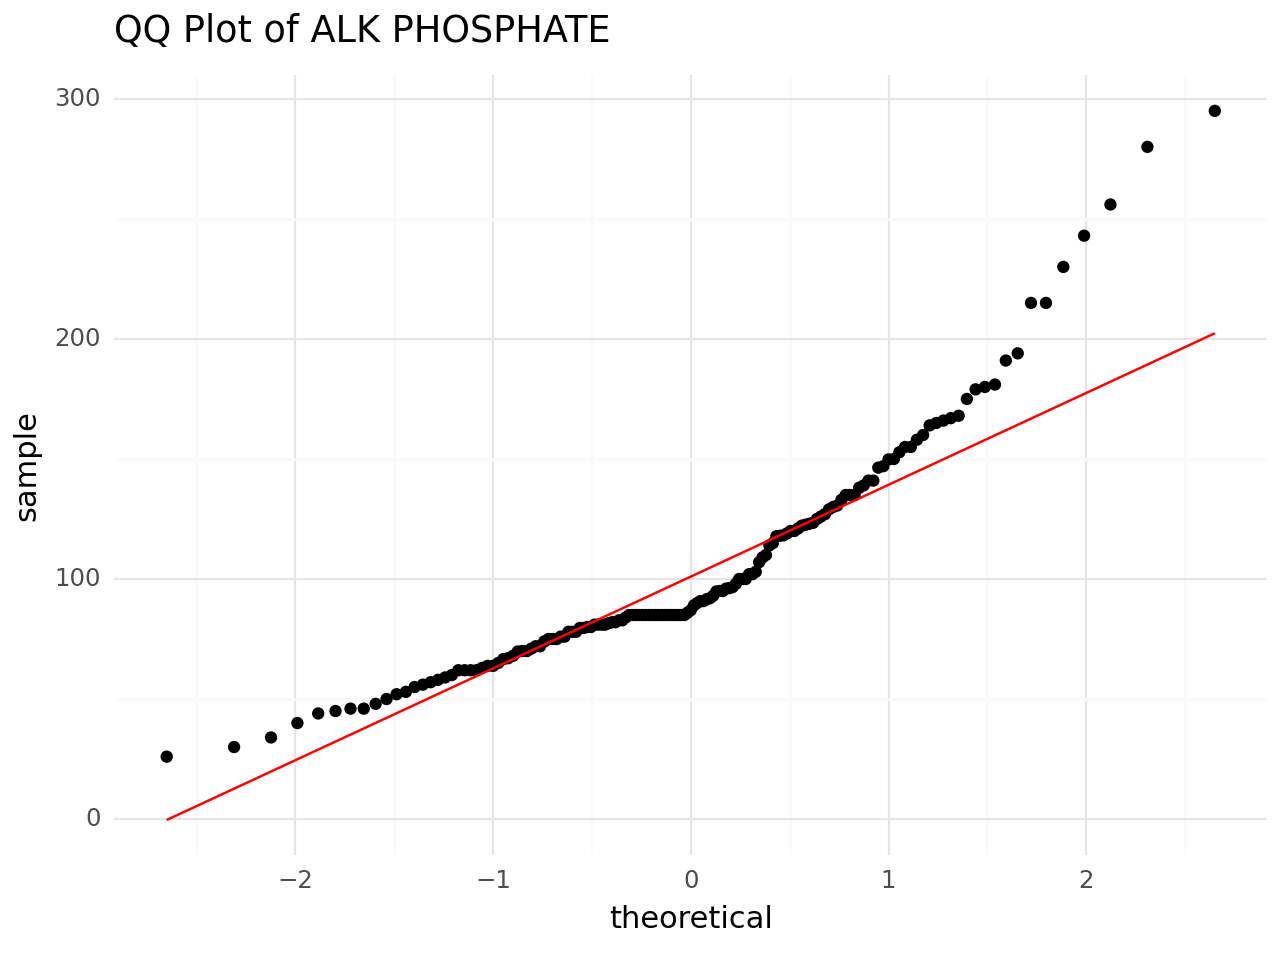

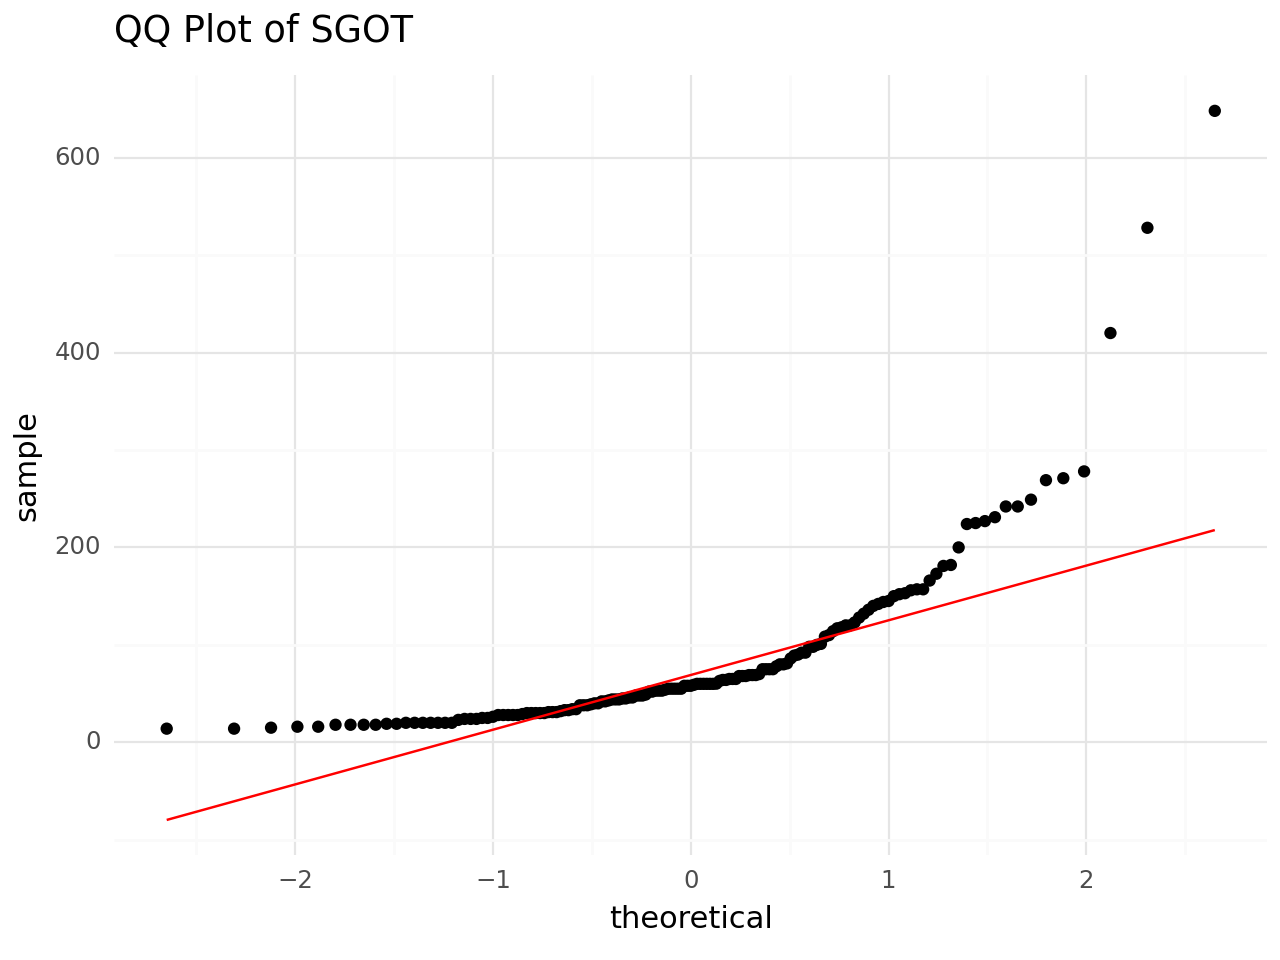

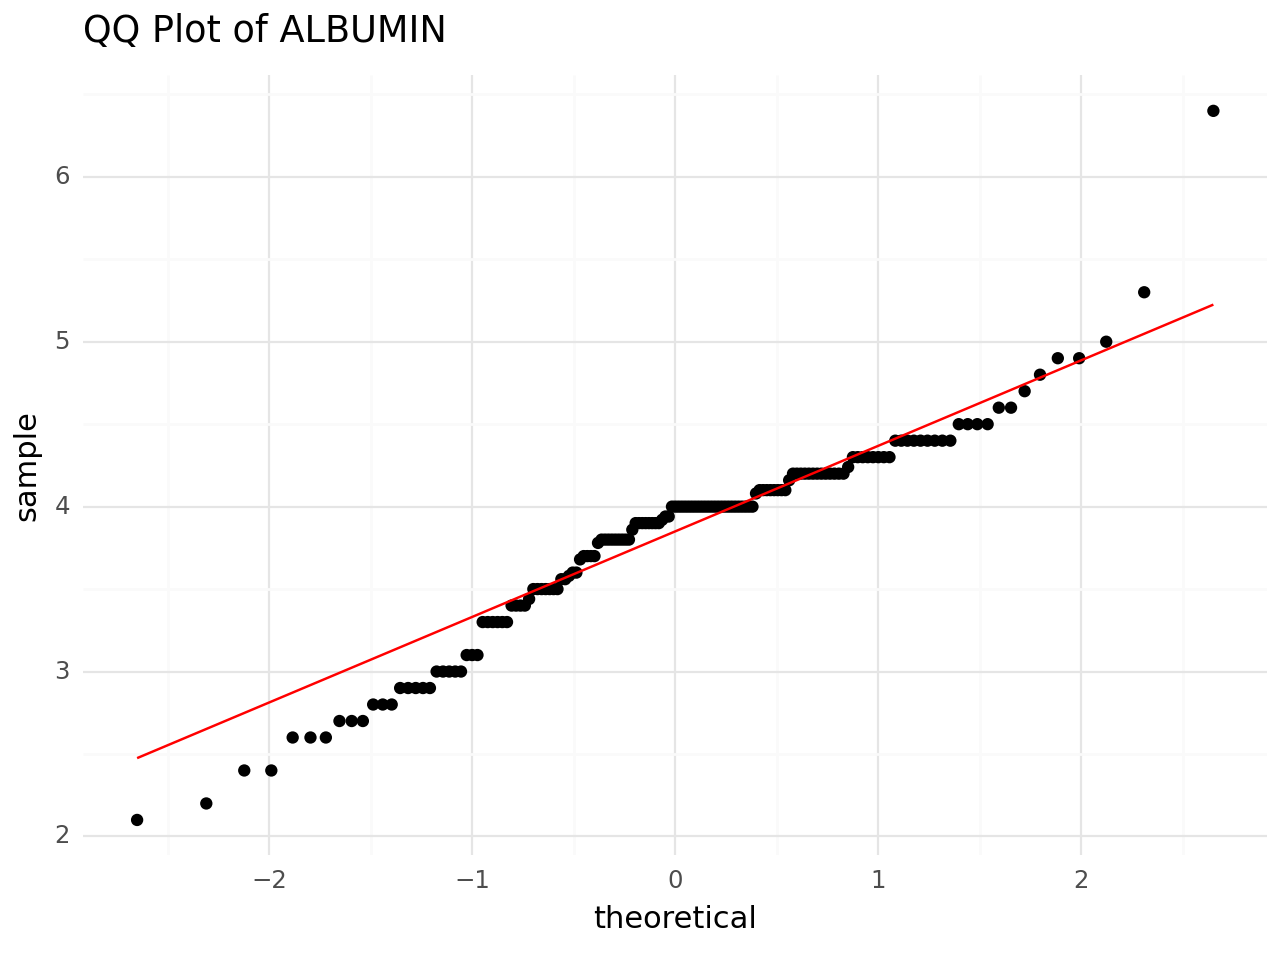

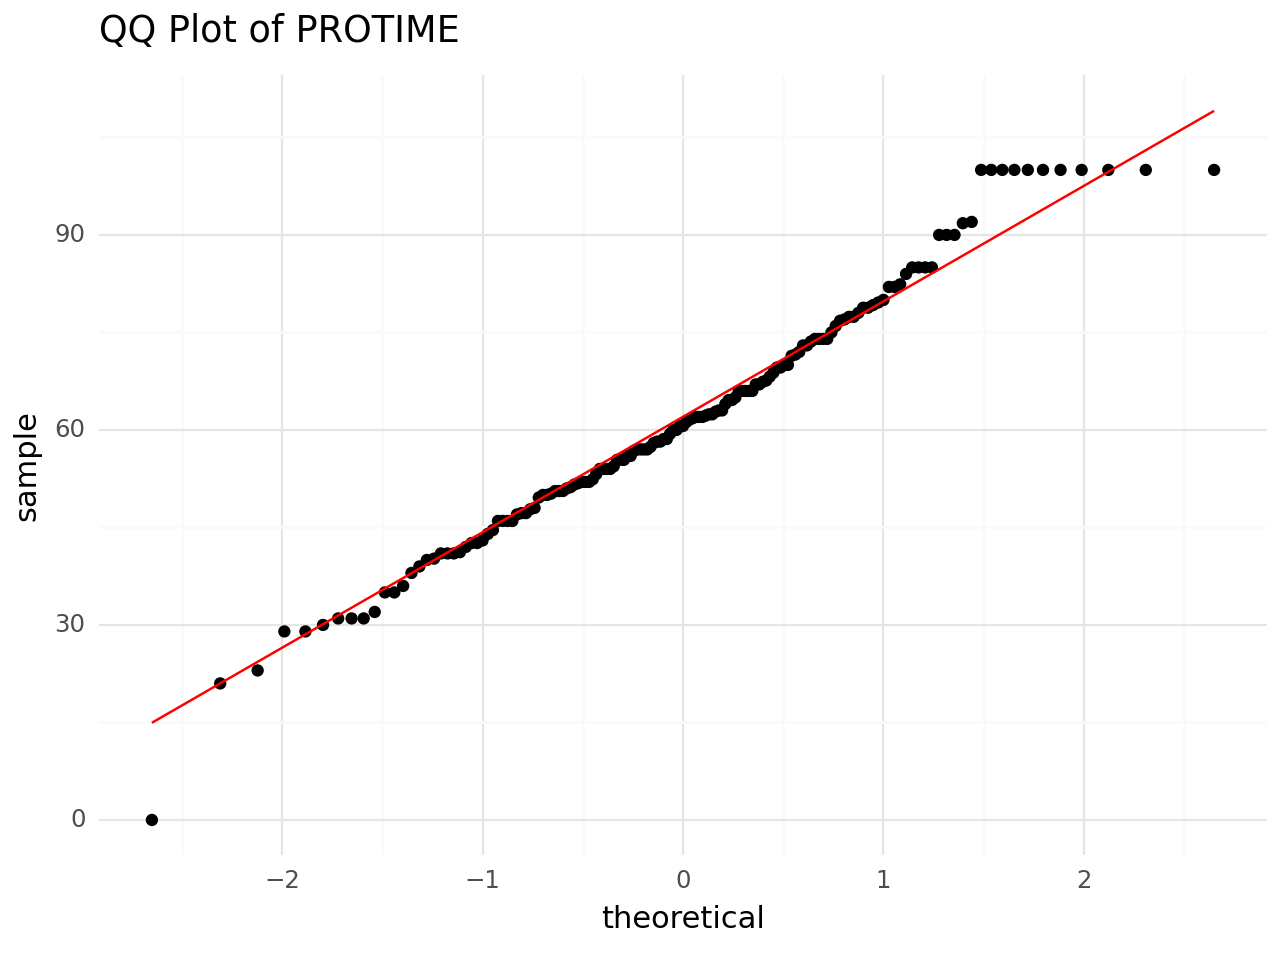

In [ ]:
# Gera gráficos QQ (QQ plots) para variáveis contínuas
for variable in continuous_cols:
    qq_plot = (ggplot(hep_data, aes(sample=variable))
               + geom_qq()
               + geom_qq_line(color="red")
               + ggtitle(f'QQ Plot of {variable.upper()}')
               + theme_minimal())
    print(qq_plot)

In [ ]:
# Reverte o mapeamento de 'Hepatitis Status' para valores numéricos
hep_data['Hepatitis Status'] = hep_data['Hepatitis Status'].map({'DIE': 1, 'LIVE': 2})

In [ ]:
# Exibe um resumo informativo sobre o DataFrame, incluindo o número de entradas, colunas e tipos de dados
hep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               155 non-null    float64 
 1   Sex               155 non-null    category
 2   Steroid           155 non-null    category
 3   Antivirals        155 non-null    category
 4   Fatigue           155 non-null    category
 5   Malaise           155 non-null    category
 6   Anorexia          155 non-null    category
 7   Liver Big         155 non-null    category
 8   Liver Firm        155 non-null    category
 9   Spleen Palpable   155 non-null    category
 10  Spiders           155 non-null    category
 11  Ascites           155 non-null    category
 12  Varices           155 non-null    category
 13  Bilirubin         155 non-null    float64 
 14  Alk Phosphate     155 non-null    float64 
 15  Sgot              155 non-null    float64 
 16  Albumin           155 non-

In [ ]:
categorical_cols = ['Sex','Steroid', 'Antivirals','Fatigue', 'Malaise', 'Anorexia',
                    'Liver Big', 'Liver Firm', 'Spleen Palpable',
                    'Spiders', 'Ascites', 'Varices','Histology']

# Codificação one-hot de colunas categóricas
df_encoded = pd.get_dummies(hep_data, columns=categorical_cols)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  155 non-null    float64
 1   Bilirubin            155 non-null    float64
 2   Alk Phosphate        155 non-null    float64
 3   Sgot                 155 non-null    float64
 4   Albumin              155 non-null    float64
 5   Protime              155 non-null    float64
 6   Hepatitis Status     155 non-null    int64  
 7   Sex_1.0              155 non-null    bool   
 8   Sex_2.0              155 non-null    bool   
 9   Steroid_1.0          155 non-null    bool   
 10  Steroid_1.6          155 non-null    bool   
 11  Steroid_2.0          155 non-null    bool   
 12  Antivirals_1.0       155 non-null    bool   
 13  Antivirals_2.0       155 non-null    bool   
 14  Fatigue_1.0          155 non-null    bool   
 15  Fatigue_1.6          155 non-null    boo

## Predições

In [ ]:
import warnings
import xgboost as xgb  # Biblioteca para implementação do algoritmo XGBoost
from catboost import CatBoostClassifier  # Biblioteca para o algoritmo CatBoost, eficiente para dados categóricos
from collections import Counter  # Biblioteca para contagem de elementos em uma coleção

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler  # Utilizado para normalizar os dados

# Modelos de aprendizado de máquina
from sklearn.svm import SVC  # Suporte a vetores de classificação
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.ensemble import RandomForestClassifier  # Modelos de ensemble
#from sklearn.tree import DecisionTreeClassifier  # Classificador de árvore de decisão (comentado)
from sklearn.naive_bayes import GaussianNB  # Classificador Naive Bayes
#from sklearn.neighbors import KNeighborsClassifier  # Classificador K-Nearest Neighbors (comentado)

# Métricas para avaliação de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas básicas de avaliação
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve  # Métricas avançadas de avaliação

# Seleção e validação de modelos
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split  # Ferramentas para seleção e validação de modelos
from sklearn.model_selection import StratifiedKFold, cross_val_predict  # Validação cruzada estratificada e predição com validação cruzada

# Pipeline para encadeamento de transformações e estimadores
from sklearn.pipeline import Pipeline, make_pipeline  # Construção de pipelines
from imblearn.pipeline import make_pipeline as make_pipeline_imb  # Pipeline da biblioteca imbalanced-learn
from imblearn.pipeline import Pipeline as ImbalancedPipeline  # Pipeline da biblioteca imbalanced-learn

# Técnicas de oversampling para lidar com dados desbalanceados
from imblearn.over_sampling import ADASYN, SMOTE, SVMSMOTE  # Técnicas de oversampling

# Suprimir avisos de futuras versões para manter a saída limpa
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dividir Dados em Conjuntos de Treinamento e Teste

In [ ]:
# Divide os dados em X (características) e y (alvo)
X = df_encoded.drop('Hepatitis Status', axis=1)
y = df_encoded['Hepatitis Status']

# Divide Dados em Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

## Regressão Logísticia

In [ ]:
model_name = 'Logistic Regression'

# Configura a validação cruzada estratificada com 5 divisões (splits)
# StratifiedKFold garante que cada divisão mantenha a proporção original das classes
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define o classificador de Regressão Logística
# max_iter é o número máximo de iterações para a convergência do algoritmo
# class_weight='balanced' ajusta automaticamente os pesos das classes inversamente proporcionais à sua frequência
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Cria um pipeline com as etapas de normalização, oversampling e classificação
pipeline = ImbalancedPipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados para ter média 0 e variância 1
    ('adasyn', ADASYN(random_state=42)),  # Aplica o método de oversampling ADASYN para balancear as classes
    ('classifier', logistic_regression)  # Utiliza o classificador de Regressão Logística
])

# Usa cross_val_predict para obter previsões para cada divisão da validação cruzada nos dados de treinamento
# Isso permite avaliar o desempenho do modelo em cada divisão
logistic_predictions_train = cross_val_predict(pipeline, X_train, y_train, cv=stratified_kfold)

# Calcula a acurácia das previsões nos dados de treinamento
accuracy_log_train = accuracy_score(y_train, logistic_predictions_train)

# Calcula e exibe a matriz de confusão para os dados de treinamento
# A matriz de confusão mostra o desempenho do modelo em termos de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
conf_matrix_logistic_train = confusion_matrix(y_train, logistic_predictions_train)
print(f"Matriz de Confusão para os Dados de Treinamento ({model_name}):")
print(conf_matrix_logistic_train)
print("\n")

# Exibe a acurácia dos dados de treinamento
# A acurácia é a proporção de previsões corretas entre o total de previsões
print(f"Acurácia dos Dados de Treinamento ({model_name}): {accuracy_log_train * 100:.2f}%\n")

# Gera e exibe um relatório de classificação para o desempenho nos dados de treinamento
# O relatório de classificação inclui métricas como precisão, recall, f1-score para cada classe
class_report_logistic_train = classification_report(y_train, logistic_predictions_train, zero_division=0)
print(f"Relatório de Classificação para os Dados de Treinamento ({model_name}):")
print(class_report_logistic_train)

# Ajusta o pipeline aos dados de treinamento completos
# O pipeline aplica as etapas de pré-processamento e ajusta o modelo aos dados de treinamento
pipeline.fit(X_train, y_train)

# Faz previsões nos dados de teste
logistic_predictions_test = pipeline.predict(X_test)

# Calcula a acurácia e a matriz de confusão para os dados de teste
# Avalia o desempenho do modelo nos dados de teste
accuracy_log_test = accuracy_score(y_test, logistic_predictions_test)
conf_matrix_logistic_test = confusion_matrix(y_test, logistic_predictions_test)

# Exibe as avaliações dos dados de teste
print(f"\nMatriz de Confusão para os Dados de Teste ({model_name}):")
print(conf_matrix_logistic_test)
print(f"Acurácia dos Dados de Teste ({model_name}): {accuracy_log_test * 100:.2f}%\n")

# Gera e exibe um relatório de classificação para o desempenho nos dados de teste
class_report_logistic_test = classification_report(y_test, logistic_predictions_test, zero_division=0)
print(f"Relatório de Classificação para os Dados de Teste ({model_name}):")
print(class_report_logistic_test)

Matriz de Confusão para os Dados de Treinamento (Logistic Regression):
[[15 10]
 [19 80]]


Acurácia dos Dados de Treinamento (Logistic Regression): 76.61%

Relatório de Classificação para os Dados de Treinamento (Logistic Regression):
              precision    recall  f1-score   support

           1       0.44      0.60      0.51        25
           2       0.89      0.81      0.85        99

    accuracy                           0.77       124
   macro avg       0.67      0.70      0.68       124
weighted avg       0.80      0.77      0.78       124


Matriz de Confusão para os Dados de Teste (Logistic Regression):
[[ 3  4]
 [ 4 20]]
Acurácia dos Dados de Teste (Logistic Regression): 74.19%

Relatório de Classificação para os Dados de Teste (Logistic Regression):
              precision    recall  f1-score   support

           1       0.43      0.43      0.43         7
           2       0.83      0.83      0.83        24

    accuracy                           0.74        31
  

## Support Vector Machine (SVM)

In [ ]:
model_name = 'SVC'

# Configura a validação cruzada estratificada com 5 divisões (splits)
# StratifiedKFold garante que cada divisão mantenha a proporção original das classes
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define o pipeline com StandardScaler e SVC
# StandardScaler normaliza os dados e SVC faz a classificação com kernel RBF e ajuste automático dos pesos das classes
pipeline = ImbalancedPipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados para ter média 0 e variância 1
    ('classifier', SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=42))  # Utiliza o classificador SVC com kernel RBF
])

# Usa cross_val_predict para obter previsões para cada divisão da validação cruzada nos dados de treinamento
# Isso permite avaliar o desempenho do modelo em cada divisão
svc_predictions_train = cross_val_predict(pipeline, X_train, y_train, cv=stratified_kfold)

# Calcula a acurácia das previsões nos dados de treinamento
accuracy_svc_train = accuracy_score(y_train, svc_predictions_train)

# Calcula e exibe a matriz de confusão para os dados de treinamento
# A matriz de confusão mostra o desempenho do modelo em termos de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
conf_matrix_svc_train = confusion_matrix(y_train, svc_predictions_train)
print(f"Matriz de Confusão para os Dados de Treinamento ({model_name}):")
print(conf_matrix_svc_train)
print("\n")

# Exibe a acurácia dos dados de treinamento
# A acurácia é a proporção de previsões corretas entre o total de previsões
print(f"Acurácia dos Dados de Treinamento ({model_name}): {accuracy_svc_train * 100:.2f}%\n")

# Gera e exibe um relatório de classificação para o desempenho nos dados de treinamento
# O relatório de classificação inclui métricas como precisão, recall, f1-score para cada classe
class_report_svc_train = classification_report(y_train, svc_predictions_train, zero_division=0)
print(f"Relatório de Classificação para os Dados de Treinamento ({model_name}):")
print(class_report_svc_train)

# Ajusta o pipeline aos dados de treinamento completos
# O pipeline aplica as etapas de pré-processamento e ajusta o modelo aos dados de treinamento
pipeline.fit(X_train, y_train)

# Faz previsões nos dados de teste
svc_predictions_test = pipeline.predict(X_test)

# Calcula a acurácia e a matriz de confusão para os dados de teste
# Avalia o desempenho do modelo nos dados de teste
accuracy_svc_test = accuracy_score(y_test, svc_predictions_test)
conf_matrix_svc_test = confusion_matrix(y_test, svc_predictions_test)

# Exibe as avaliações dos dados de teste
print(f"\nMatriz de Confusão para os Dados de Teste ({model_name}):")
print(conf_matrix_svc_test)
print(f"Acurácia dos Dados de Teste ({model_name}): {accuracy_svc_test * 100:.2f}%\n")
class_report_svc_test = classification_report(y_test, svc_predictions_test, zero_division=0)
print(f"Relatório de Classificação para os Dados de Teste ({model_name}):")
print(class_report_svc_test)

Matriz de Confusão para os Dados de Treinamento (SVC):
[[16  9]
 [15 84]]


Acurácia dos Dados de Treinamento (SVC): 80.65%

Relatório de Classificação para os Dados de Treinamento (SVC):
              precision    recall  f1-score   support

           1       0.52      0.64      0.57        25
           2       0.90      0.85      0.88        99

    accuracy                           0.81       124
   macro avg       0.71      0.74      0.72       124
weighted avg       0.83      0.81      0.81       124


Matriz de Confusão para os Dados de Teste (SVC):
[[ 4  3]
 [ 5 19]]
Acurácia dos Dados de Teste (SVC): 74.19%

Relatório de Classificação para os Dados de Teste (SVC):
              precision    recall  f1-score   support

           1       0.44      0.57      0.50         7
           2       0.86      0.79      0.83        24

    accuracy                           0.74        31
   macro avg       0.65      0.68      0.66        31
weighted avg       0.77      0.74      0.75 

## Random Forest Classfier

In [ ]:
model_name = 'Random Forest with ADASYN'

# Configura a validação cruzada estratificada com 5 divisões (splits)
# StratifiedKFold garante que cada divisão mantenha a proporção original das classes
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define o classificador Random Forest com ADASYN no pipeline
# StandardScaler normaliza os dados, ADASYN aplica oversampling, e RandomForestClassifier faz a classificação
rf_pipeline = ImbalancedPipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados para ter média 0 e variância 1
    ('adasyn', ADASYN(random_state=42)),  # Aplica o método de oversampling ADASYN para balancear as classes
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))  # Utiliza o classificador Random Forest com 100 árvores
])

# Usa cross_val_predict para obter previsões para cada divisão da validação cruzada nos dados de treinamento
# Isso permite avaliar o desempenho do modelo em cada divisão
rf_predictions_train = cross_val_predict(rf_pipeline, X_train, y_train, cv=stratified_kfold)

# Calcula a acurácia das previsões nos dados de treinamento
accuracy_rf_train = accuracy_score(y_train, rf_predictions_train)

# Calcula e exibe a matriz de confusão para os dados de treinamento
# A matriz de confusão mostra o desempenho do modelo em termos de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
conf_matrix_rf_train = confusion_matrix(y_train, rf_predictions_train)
print(f"Matriz de Confusão para os Dados de Treinamento ({model_name}):")
print(conf_matrix_rf_train)
print("\n")

# Exibe a acurácia dos dados de treinamento
# A acurácia é a proporção de previsões corretas entre o total de previsões
print(f"Acurácia dos Dados de Treinamento ({model_name}): {accuracy_rf_train * 100:.2f}%\n")

# Gera e exibe um relatório de classificação para o desempenho nos dados de treinamento
# O relatório de classificação inclui métricas como precisão, recall, f1-score para cada classe
class_report_rf_train = classification_report(y_train, rf_predictions_train, zero_division=0)
print(f"Relatório de Classificação para os Dados de Treinamento ({model_name}):")
print(class_report_rf_train)

# Ajusta o pipeline aos dados de treinamento completos
# O pipeline aplica as etapas de pré-processamento e ajusta o modelo aos dados de treinamento
rf_pipeline.fit(X_train, y_train)

# Faz previsões nos dados de teste
rf_predictions_test = rf_pipeline.predict(X_test)

# Calcula a acurácia e a matriz de confusão para os dados de teste
# Avalia o desempenho do modelo nos dados de teste
accuracy_rf_test = accuracy_score(y_test, rf_predictions_test)
conf_matrix_rf_test = confusion_matrix(y_test, rf_predictions_test)

# Exibe as avaliações dos dados de teste
print(f"\nMatriz de Confusão para os Dados de Teste ({model_name}):")
print(conf_matrix_rf_test)
print(f"Acurácia dos Dados de Teste ({model_name}): {accuracy_rf_test * 100:.2f}%\n")
class_report_rf_test = classification_report(y_test, rf_predictions_test, zero_division=0)
print(f"Relatório de Classificação para os Dados de Teste ({model_name}):")
print(class_report_rf_test)

Matriz de Confusão para os Dados de Treinamento (Random Forest with ADASYN):
[[16  9]
 [11 88]]


Acurácia dos Dados de Treinamento (Random Forest with ADASYN): 83.87%

Relatório de Classificação para os Dados de Treinamento (Random Forest with ADASYN):
              precision    recall  f1-score   support

           1       0.59      0.64      0.62        25
           2       0.91      0.89      0.90        99

    accuracy                           0.84       124
   macro avg       0.75      0.76      0.76       124
weighted avg       0.84      0.84      0.84       124


Matriz de Confusão para os Dados de Teste (Random Forest with ADASYN):
[[ 3  4]
 [ 3 21]]
Acurácia dos Dados de Teste (Random Forest with ADASYN): 77.42%

Relatório de Classificação para os Dados de Teste (Random Forest with ADASYN):
              precision    recall  f1-score   support

           1       0.50      0.43      0.46         7
           2       0.84      0.88      0.86        24

    accuracy        

## Comparação para Diferentes Modelos

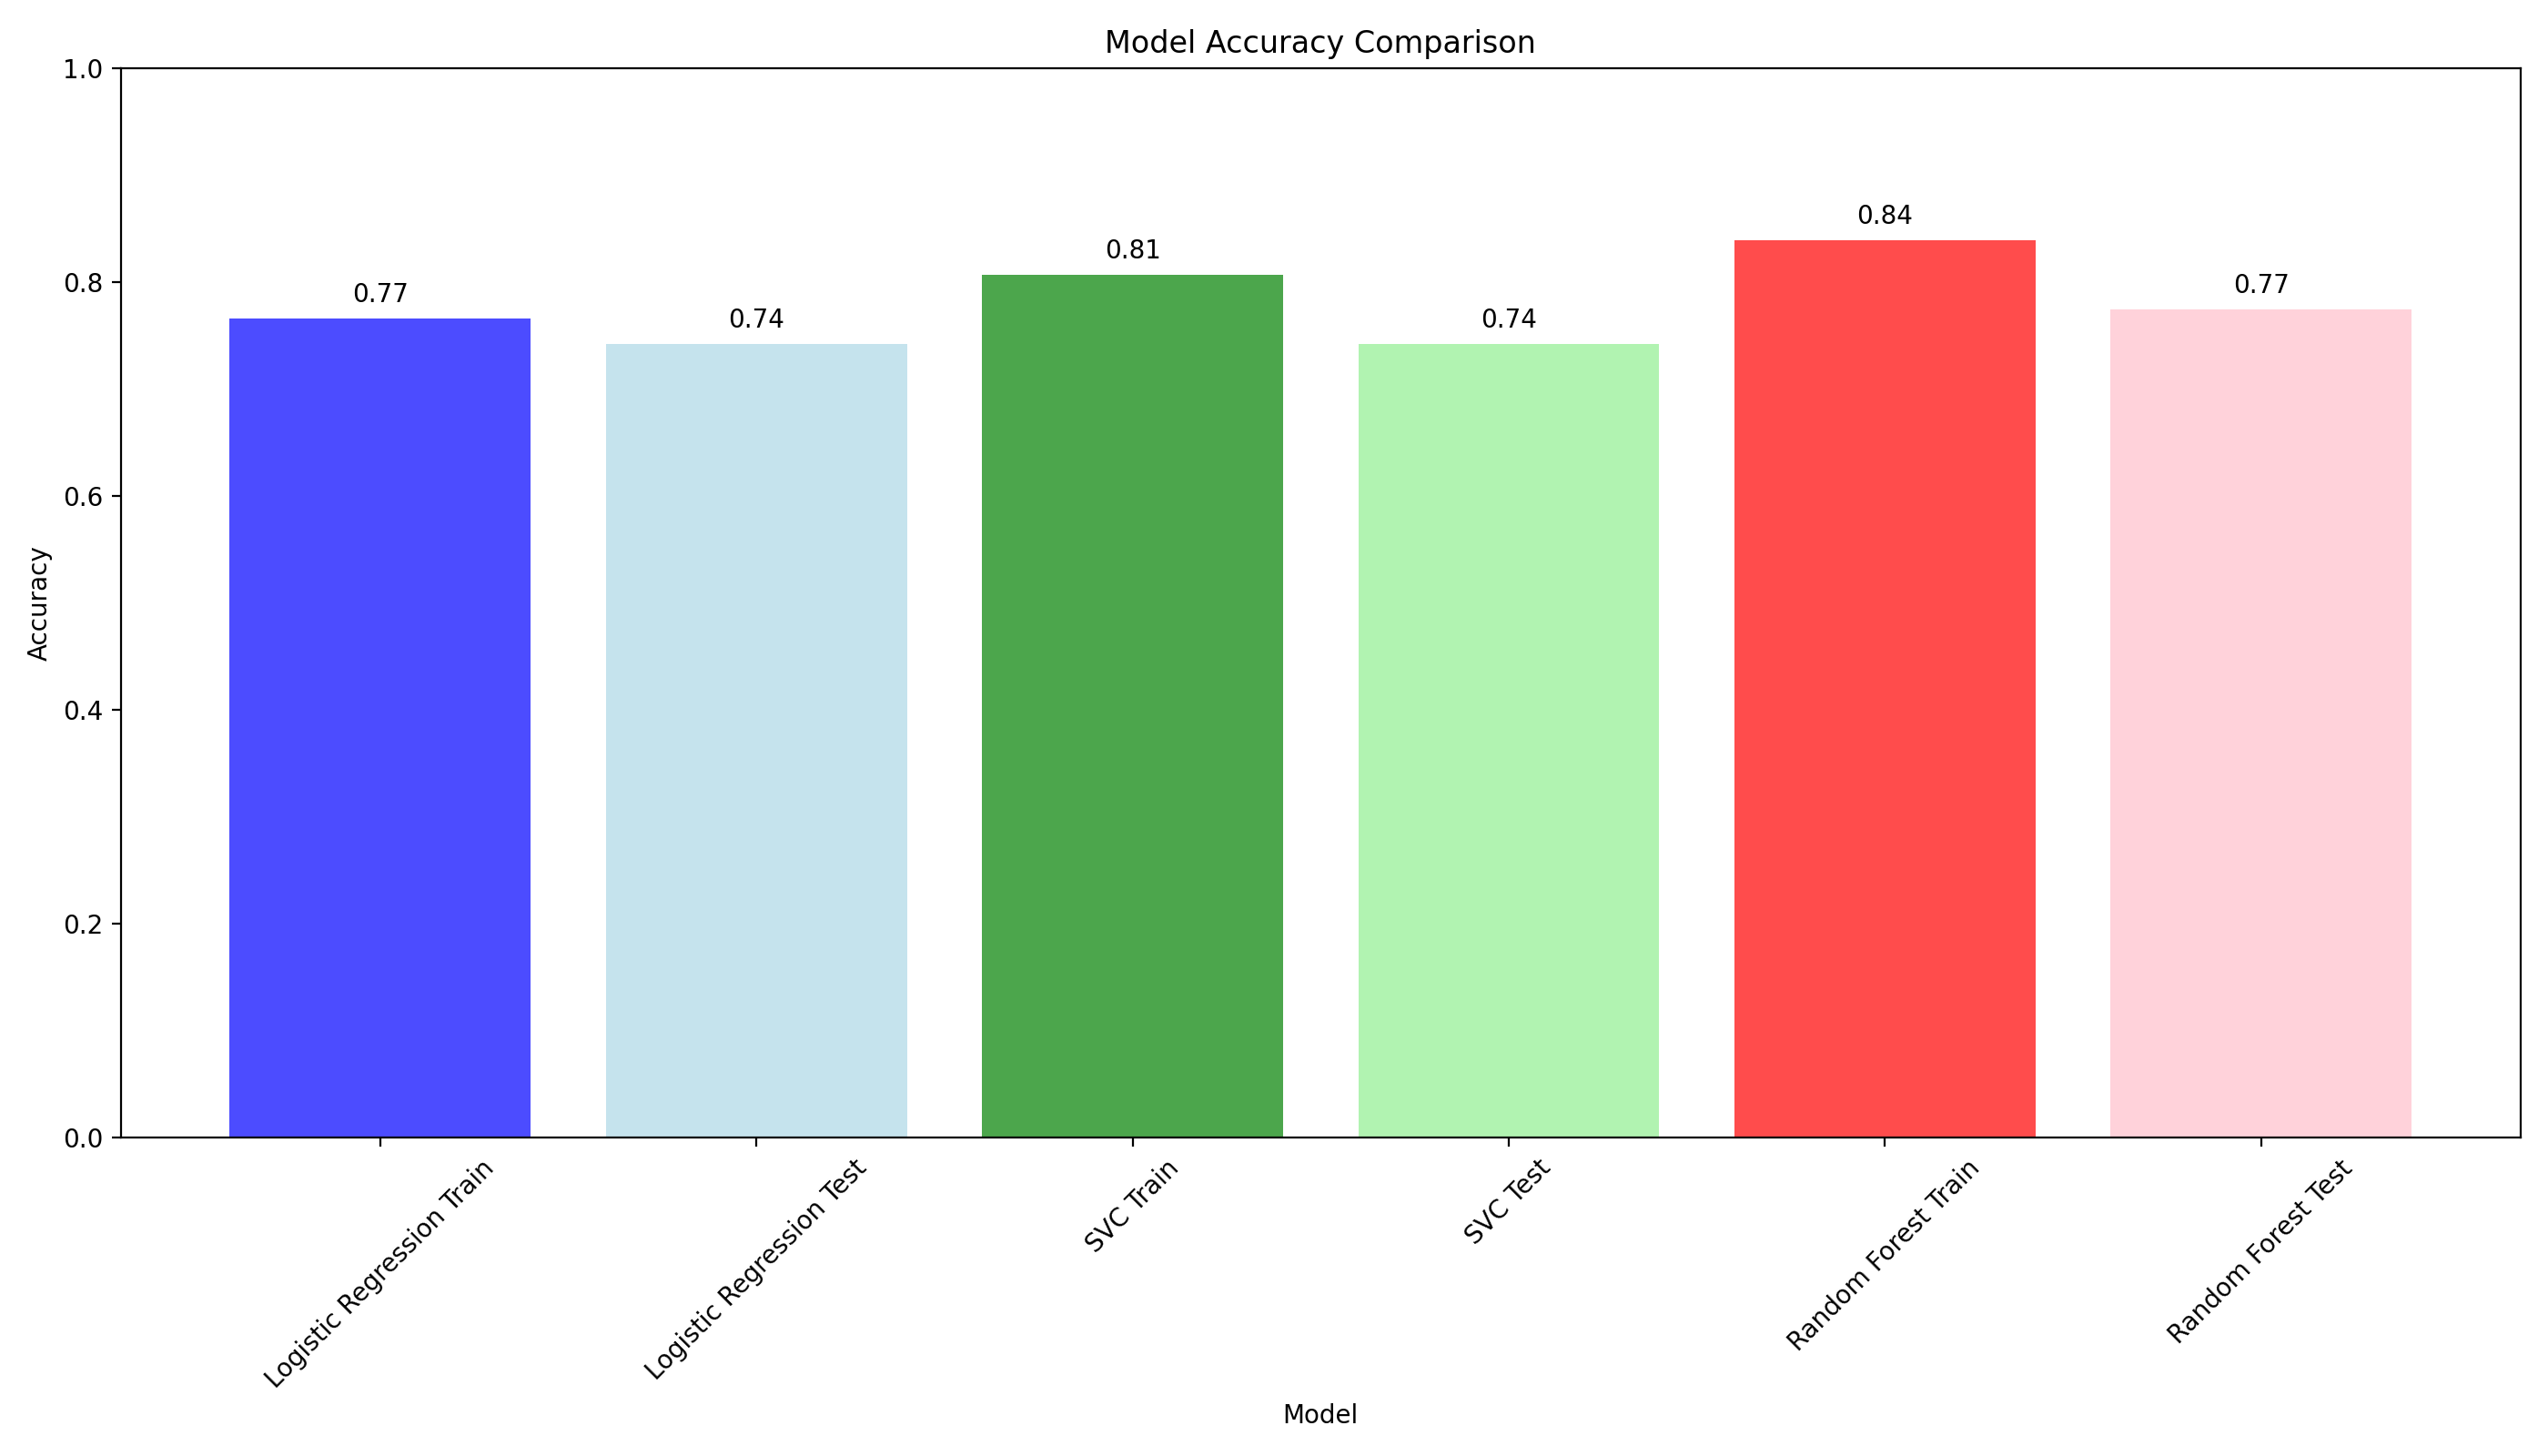

In [ ]:
# Lista de acurácias dos modelos treinados e testados
accuracies = [
    accuracy_log_train,  # Acurácia do modelo de Regressão Logística no conjunto de treinamento
    accuracy_log_test,   # Acurácia do modelo de Regressão Logística no conjunto de teste
    accuracy_svc_train,  # Acurácia do modelo SVC no conjunto de treinamento
    accuracy_svc_test,   # Acurácia do modelo SVC no conjunto de teste
    accuracy_rf_train,  # Acurácia do modelo Random Forest no conjunto de treinamento
    accuracy_rf_test,   # Acurácia do modelo Random Forest no conjunto de teste
]

# Lista de nomes dos modelos
models = [
    'Logistic Regression Train', 'Logistic Regression Test',
    'SVC Train', 'SVC Test',
    'Random Forest Train', 'Random Forest Test',
]

# Nomes das cores para os modelos
colors = [
    'blue', 'lightblue', 'green', 'lightgreen',
    'red', 'pink'
]

# Plotagem do gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Define o tamanho da figura
plt.bar(models, accuracies, color=colors, alpha=0.7)  # Cria o gráfico de barras com cores e transparência
plt.xlabel('Model')  # Rótulo do eixo x
plt.ylabel('Accuracy')  # Rótulo do eixo y
plt.title('Model Accuracy Comparison')  # Título do gráfico
plt.ylim([0, 1])  # Define os limites do eixo y
plt.xticks(ticks=range(len(models)), labels=models, rotation=45)  # Define os rótulos do eixo x com rotação

# Adiciona os valores de acurácia acima das barras
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()  # Exibe o gráfico

## Salva e faz download do modelo Random Forest

In [ ]:
# Salvando o modelo Random Forest treinado em um arquivo
import pickle
filename = 'final_rf_model.sav'
pickle.dump(rf_pipeline, open(filename, 'wb'))  # Serializa o pipeline do modelo Random Forest e salva em um arquivo